# Group 20 
# Responsibilities of Members
Mario - Feature engineering (label encoded features, transforming target into binary value, feature selection using pca) oversampled using ADASYN, created and fitted models for Logistic regression, LDA, MLP, and SVM.
<br><br>Lucy - Feature engineering (label encoded features, transforming target into binary value, feature selection pvalues and), created data visualization, oversampled using resampling and smote,created and fitted models for KNN, Decision Tree, and Random Forest, and chose thresholds for all the models. 
<br><br>Akshay - merged the portuguese and math dataset, features selection using RFE,created and fitted model for Extreme Gradient Boosting, recall precison curve

In [6]:
#Importing Libraries

# linear algebra
import numpy as np 
import math

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms/Models
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import warnings;
warnings.filterwarnings('ignore');
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix


## Separate Dataset

In [7]:
#Importing Data
mat_df = pd.read_csv("student-mat.csv")
por_df = pd.read_csv("student-por.csv")

# por_df.info()
# mat_df.info()



In [8]:
#Merging Data
# list1 = list(range(11))
# list1.append(19)
# list1.append(21)
# hashes_mat = []
# for row in range(np.shape(mat_df)[0]):
#     record = ""
#     for col in list1:
#         record = record + str(mat_df.iloc[row, col])
#     hashes_mat.append(hash(record))
# mat_df['hash'] = hashes_mat
# hashes_por = []
# for row in range(np.shape(por_df)[0]):
#     record = ""
#     for col in list1:
#         record = record + str(por_df.iloc[row, col])
#     hashes_por.append(hash(record))
# por_df['hash'] = hashes_por
# mat_df['in_Math'] = 1
# mat_df['in_Portuguese'] = 0
# por_df['in_Portuguese'] = 1
# por_df['in_Math'] = 0
# mat_df = mat_df.rename(index=str, columns={"G1": "G1_mat", "G2": "G2_mat", "G3": "G3_mat"})
# por_df = por_df.rename(index=str, columns={"G1": "G1_por", "G2": "G2_por", "G3": "G3_por"})
# intersection = list(set(hashes_por) & set(hashes_mat))

# merged = por_df.copy(deep = True)

# extra_math = pd.DataFrame()
# for row in range(np.shape(mat_df)[0]):
#     try:
#         intersection.index(mat_df.hash[row])
#     except:
#         extra_math = extra_math.append(mat_df.iloc[[row]])

# # print(np.shape(mat_df))
# # print(np.shape(extra_math))
# # print(np.shape(intersection))

# merged = merged.append(extra_math, ignore_index = True)
# i = 0
# for row in range(np.shape(merged)[0]):
#     try:
# #         print(row)
#         hash_i = merged.hash[row]
#         intersection.index(hash_i)
#         i+=1
#         merged.in_Math[row] = 1
#         index_math = list(mat_df.hash).index(hash_i)
#         merged.G1_mat[row] = mat_df.G1_mat[index_math]
#         merged.G2_mat[row] = mat_df.G2_mat[index_math]
#         merged.G3_mat[row] = mat_df.G3_mat[index_math]
#     except:
#         continue
        
        

        

In [9]:
#por_df.describe(include='all')
#mat_df.describe(include='all')


In [10]:
# summing weekend and weekday alcohol consumption 
# por_df['SumAlc'] = ((por_df['Dalc']*5 + por_df['Walc']*2)/7).astype(int)
# mat_df['SumAlc'] = ((mat_df['Dalc']*5 + mat_df['Walc']*2)/7).astype(int)

# # converting alcohol consumption rate into two classes: Non drinkers and drinkers
# threshold = 3

# por_df.loc[por_df['SumAlc'] < threshold, 'SumAlc'] = 0 #non drinkers
# por_df.loc[por_df['SumAlc'] >= threshold, 'SumAlc'] = 1 #drinkers

# mat_df.loc[mat_df['SumAlc'] < threshold, 'SumAlc'] = 0
# mat_df.loc[mat_df['SumAlc'] >= threshold, 'SumAlc'] = 1




In [11]:
#Drinker vs health for Portuguese
#plt.figure(figsize=(10,6))
#sns.set(font_scale=2)
#sns.countplot(x=por_df.health,hue=por_df.SumAlc);

In [12]:
#drinker distribution by absences for Math
# target_0 = mat_df[mat_df['SumAlc'] == 0]
# target_1 = mat_df[mat_df['SumAlc'] == 1]

#plt.figure(figsize=(10,6))
#sns.distplot(target_0['absences'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = "Non drinkers")
#sns.distplot(target_1['absences'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = "Drinkers")


In [13]:
#drinker distribution by absences 
#plt.figure(figsize=(10,6))
#sns.set(font_scale=2)
#sns.countplot(x=por_df.goout,hue=por_df.SumAlc);

#plt.figure(figsize=(10,6))
#sns.set(font_scale=2)
#sns.countplot(x=mat_df.goout,hue=mat_df.SumAlc);

In [14]:
# Converting qualitative values to numerical values
# School = {'GP':1, 'MS':0}
# por_df['school'] = por_df['school'].map(School)

# gender = {'M':1, 'F':0}
# por_df['sex'] = por_df['sex'].map(gender)

# addressmap = {'U':1, 'R':0}
# por_df['address'] = por_df['address'].map(addressmap)

# familysize = {'GT3':1, 'LE3':0}
# por_df['famsize'] = por_df['famsize'].map(familysize)

# ParentStatus = {'A':1, 'T':0}
# por_df['Pstatus'] = por_df['Pstatus'].map(ParentStatus)

# Jobs = {'at_home':0,'health':1,'other':2,'services':3,'teacher':4}
# por_df['Mjob'] = por_df['Mjob'].map(Jobs)
# por_df['Fjob'] = por_df['Fjob'].map(Jobs)
# por_df['reason'].unique()
# reasons = {'course':0,'other':1,'home':2,'reputation':3}
# por_df['reason'] = por_df['reason'].map(reasons)
# guardians = {'mother':0,'father':1,'other':2}
# por_df['guardian'] = por_df['guardian'].map(guardians)

# BinaryValue = {'yes':1, 'no':0}
# por_df['schoolsup'] = por_df['schoolsup'].map(BinaryValue)
# por_df['famsup'] = por_df['famsup'].map(BinaryValue)
# por_df['paid'] = por_df['paid'].map(BinaryValue)
# por_df['activities'] = por_df['activities'].map(BinaryValue)
# por_df['nursery'] = por_df['nursery'].map(BinaryValue)
# por_df['higher'] = por_df['higher'].map(BinaryValue)
# por_df['internet'] = por_df['internet'].map(BinaryValue)
# por_df['romantic'] = por_df['romantic'].map(BinaryValue)



In [15]:
# School = {'GP':1, 'MS':0}
# mat_df['school'] =mat_df['school'].map(School)

# gender = {'M':1, 'F':0}
# mat_df['sex'] = mat_df['sex'].map(gender)

# addressmap = {'U':1, 'R':0}
# mat_df['address'] = mat_df['address'].map(addressmap)

# familysize = {'GT3':1, 'LE3':0}
# mat_df['famsize'] = mat_df['famsize'].map(familysize)

# ParentStatus = {'A':1, 'T':0}
# mat_df['Pstatus'] = mat_df['Pstatus'].map(ParentStatus)

# Jobs = {'at_home':0,'health':1,'other':2,'services':3,'teacher':4}
# mat_df['Mjob'] = mat_df['Mjob'].map(Jobs)
# mat_df['Fjob'] = mat_df['Fjob'].map(Jobs)
# mat_df['reason'].unique()
# reasons = {'course':0,'other':1,'home':2,'reputation':3}
# mat_df['reason'] = mat_df['reason'].map(reasons)
# guardians = {'mother':0,'father':1,'other':2}
# mat_df['guardian'] = mat_df['guardian'].map(guardians)

# BinaryValue = {'yes':1, 'no':0}
# mat_df['schoolsup'] = mat_df['schoolsup'].map(BinaryValue)
# mat_df['famsup'] = mat_df['famsup'].map(BinaryValue)
# mat_df['paid'] = mat_df['paid'].map(BinaryValue)
# mat_df['activities'] = mat_df['activities'].map(BinaryValue)
# mat_df['nursery'] = mat_df['nursery'].map(BinaryValue)
# mat_df['higher'] = mat_df['higher'].map(BinaryValue)
# mat_df['internet'] = mat_df['internet'].map(BinaryValue)
# mat_df['romantic'] = mat_df['romantic'].map(BinaryValue)



In [16]:
#por_df
# corr = por_df.corr()
# corr.style.background_gradient()

#plt.figure(figsize=(15,15))
#sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot = True, annot_kws={"size": 10}, fmt = ".2f",cbar = True)

In [17]:
# mat_df
#corrmat =mat_df.corr()
#corrmat.style.background_gradient()
#plt.figure(figsize=(15,15))
#sns.heatmap(corrmat, xticklabels=corrmat.columns.values,yticklabels=corrmat.columns.values, annot = True, annot_kws={"size": 10}, fmt = ".2f",cbar = True)

In [18]:
# FINDING P_VALUES FOR PORTUGUESE DATA SET
# model=smf.ols('SumAlc~school+sex+age+address+famsize+Pstatus+Medu+Fedu+Mjob+Fjob+reason+guardian+traveltime+studytime+failures+schoolsup+famsup+paid+activities+nursery+higher+internet+romantic+famrel+freetime+goout+health+absences+G1+G2+G3', por_df)
# Fitting_results=model.fit()
# print('p-values are: \n',Fitting_results.pvalues)

# FINDING P_VALUES FOR MATH DATA SET
# model=smf.ols('SumAlc~school+sex+age+address+famsize+Pstatus+Medu+Fedu+Mjob+Fjob+reason+guardian+traveltime+studytime+failures+schoolsup+famsup+paid+activities+nursery+higher+internet+romantic+famrel+freetime+goout+health+absences+G1+G2+G3', mat_df)
# Fitting_results=model.fit()
# print('math p-values are: \n',Fitting_results.pvalues)



In [19]:
# X_features = por_df.drop(columns=['Dalc', 'Walc','SumAlc'])
# Y_targetClass=por_df['SumAlc']
# X_features.describe()
# X_train, X_test, Y_train, Y_test= train_test_split(X_features, Y_targetClass, random_state= 0)

# scaler=preprocessing.MinMaxScaler().fit(X_train)
# X_train_transformed=scaler.transform(X_train) 
# X_test_transformed=scaler.transform(X_test)

# X_Selected = X_features.drop(['school','Fedu','reason','failures','guardian','traveltime','studytime','failures','famsup','activities','higher','freetime'],axis = 'columns')
# X_train_selected, X_test_selected, Y_train_selected, Y_test_selected = train_test_split(X_Selected,Y_targetClass,random_state = 0)
# scaler=preprocessing.MinMaxScaler().fit(X_train_selected)
# X_train_selected_transformed=scaler.transform(X_train_selected) 
# X_test_selected_transformed=scaler.transform(X_test_selected)

In [20]:
# #FOR PORTUGUESE
# #KNN with All
# # por_df.append(por_df.loc[(por_df['SumAlc'] == 1)])

# best_score = 0;
# K = [1,5,10, 20, 30 , 40 , 50 , 60 , 70 , 80 , 90, 100]
# for k in K:
#     knn=KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train_transformed,Y_train, cv=10)
#     score=np.mean(scores)
#     if score > best_score:
#       best_score = score
#       best_k = k
        
# Bestknn=KNeighborsClassifier(n_neighbors=best_k)
# Bestknn.fit(X_train_transformed, Y_train)
# KNN_predict = Bestknn.predict(X_test_transformed)
# accuracy_KNN=accuracy_score(Y_test, KNN_predict)
# precision_KNN = precision_score(Y_test,KNN_predict)
# recall_KNN = recall_score(Y_test,KNN_predict)
# print('Best K:', best_k)
# print('accuracy:',accuracy_KNN)
# print("The precision score is ", precision_KNN)
# print("The recall score is ", recall_KNN)


# #KNN with selected features from p-values and optimal neighbors
# best_score = 0;
# K = [1,5,10, 20, 30 , 40 , 50 , 60 , 70 , 80 , 90, 100]
# for k in K:
#     knn=KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train_selected_transformed,Y_train_selected, cv=10)
#     score=np.mean(scores)
#     if score > best_score:
#       best_score = score
#       best_k = k
        
# Bestknn=KNeighborsClassifier(n_neighbors=best_k)
# Bestknn.fit(X_train_selected_transformed, Y_train_selected)
# KNN_predict = Bestknn.predict(X_test_selected_transformed)
# accuracy_KNN=accuracy_score(Y_test_selected, KNN_predict)
# precision_KNN = precision_score(Y_test_selected,KNN_predict)
# recall_KNN = recall_score(Y_test_selected,KNN_predict)
# print('Best K:', best_k)
# print('accuracy:',accuracy_KNN)
# print("The precision score is ", precision_KNN)
# print("The recall score is ", recall_KNN)


In [21]:
# ## Logistic Regression Lasso 
# best_score = 0
# k_folds = 5
# for c in [0.01,.05,0.1,0.5,1,5,10,20]:
#     logRegModel = LogisticRegression(C = c, penalty = "l1")
#     scores = cross_val_score(logRegModel, X_train_transformed,Y_train, cv = k_folds)
#     score = np.mean(scores)
#     if score > best_score:
#         best_score = score
#         best_parameter = c
    
# logRegModel_final = LogisticRegression(C = best_parameter, penalty = "l1").fit( X_train_transformed,Y_train)
# Y_lasso_predict = logRegModel_final.predict(X_test_transformed)
# accuracy_lasso = accuracy_score(Y_test,Y_lasso_predict)
# precision_lasso = precision_score(Y_test,Y_lasso_predict)
# recall_lasso = recall_score(Y_test,Y_lasso_predict)
# test_score_lasso = logRegModel_final.score(X_test_transformed,Y_test)

# # test_score
# print(best_parameter)
# print("The final accuracy is",test_score_lasso)
# print("\nThe Coefficients ", logRegModel_final.coef_)
# print("The accuracy score is ", accuracy_lasso)
# print("The precision score is ", precision_lasso)
# print("The recall score is ", recall_lasso)
# ## From the list, use all features except 1,8,11,15,16,17,18,19,21,23,25,29
# ## Display the exponential values associated with 
# #


In [22]:
# ## Logistic Regression with scaled data and features dropped
# ## Scaled Data performed worse

# best_score = 0
# k_folds = 5
# for c in [0.01,.05,0.1,0.5,1,5,10,20]:
#     logRegModel = LogisticRegression(C = c)
#     scores = cross_val_score(logRegModel, X_train_selected_transformed,Y_train_selected, cv = k_folds)
#     score = np.mean(scores)
#     #print(scores)
#     if score > best_score:
#         best_score = score
#         best_parameter = c
    
# logRegModel_final = LogisticRegression(C = best_parameter, penalty = "l1").fit(X_train_selected_transformed,Y_train_selected)
# test_score = logRegModel_final.score(X_test_selected_transformed,Y_test_selected)
# Y_Ridge_predict = logRegModel_final.predict(X_test_selected_transformed)
# accuracy_ridge = accuracy_score(Y_test_selected,Y_Ridge_predict)
# precision_ridge = precision_score(Y_test_selected,Y_Ridge_predict)
# recall_ridge = recall_score(Y_test_selected,Y_Ridge_predict)
# test_score_ridge = logRegModel_final.score(X_test_selected_transformed,Y_test_selected)
# test_score
# print(best_parameter)
# print("The final accuracy is",test_score)
# print("The accuracy score is ", accuracy_ridge)
# print("The precision score is ", precision_ridge)
# print("The recall score is ", recall_ridge)



In [23]:
# ## LDA 
# LDAmodelFitted = LinearDiscriminantAnalysis().fit(X_train_selected_transformed, Y_train_selected)
# LDA_score = LDAmodelFitted.score(X_test_selected_transformed,Y_test_selected)
# Y_LDA_predict = LDAmodelFitted.predict(X_test_selected_transformed)
# accuracy_LDA = accuracy_score(Y_test_selected,Y_LDA_predict)
# precision_LDA = precision_score(Y_test_selected,Y_LDA_predict)
# recall_LDA = recall_score(Y_test_selected,Y_LDA_predict)
# test_score_LDA = logRegModel_final.score(X_test_selected_transformed,Y_test)
# print("The accuracy score is ", accuracy_LDA)
# print("The precision score is ", precision_LDA)
# print("The recall score is ", recall_LDA)

# print("LDA scores ",LDA_score)


In [24]:
# ### Visuals of The scores
# ### Visuals of The scores
# algorithms = ['Lasso','Ridge','LDA',"KNN"]
# sns.set()
# f, axes = plt.subplots(1,3)
# ax_1 = sns.barplot(x = algorithms, y = [accuracy_lasso,accuracy_ridge,accuracy_LDA, accuracy_KNN], ax = axes[0])
# ax_1.set_title("Accuracy")
# ax_2 = sns.barplot(x = algorithms, y = [precision_lasso,precision_ridge,precision_LDA, precision_KNN], ax = axes[1])
# ax_2.set_title("Precision")
# ax_3 = sns.barplot(x = algorithms, y = [recall_lasso,recall_ridge,recall_LDA,recall_KNN ], ax = axes[2])
# ax_3.set_title("Recall")
# plt.tight_layout()

## Merged Dataset

In [25]:
# Import Dataset
merged = pd.read_csv("merged.csv")
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 40 columns):
Unnamed: 0       674 non-null int64
Dalc             674 non-null int64
Fedu             674 non-null int64
Fjob             674 non-null object
G1_mat           399 non-null float64
G1_por           649 non-null float64
G2_mat           399 non-null float64
G2_por           649 non-null float64
G3_mat           399 non-null float64
G3_por           649 non-null float64
Medu             674 non-null int64
Mjob             674 non-null object
Pstatus          674 non-null object
Walc             674 non-null int64
absences         674 non-null int64
activities       674 non-null object
address          674 non-null object
age              674 non-null int64
failures         674 non-null int64
famrel           674 non-null int64
famsize          674 non-null object
famsup           674 non-null object
freetime         674 non-null int64
goout            674 non-null int64
guardian    

In [26]:
merged.describe(include='all')

,Unnamed: 0,Dalc,Fedu,Fjob,G1_mat,G1_por,G2_mat,G2_por,G3_mat,G3_por,...,internet,nursery,paid,reason,romantic,school,schoolsup,sex,studytime,traveltime
count,674.000000,674.000000,674.000000,674,399.000000,649.000000,399.000000,649.000000,399.000000,649.000000,...,674,674,674,674,674,674,674,674,674.000000,674.000000
unique,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,4,2,2,2,2,NaN,NaN
top,NaN,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,...,yes,yes,no,course,no,GP,no,F,NaN,NaN
freq,NaN,NaN,NaN,379,NaN,NaN,NaN,NaN,NaN,NaN,...,514,537,628,295,422,441,604,396,NaN,NaN
mean,336.500000,1.500000,2.295252,NaN,10.927318,11.399076,10.746867,11.570108,10.491228,11.906009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.930267,1.565282
std,194.711325,0.920705,1.097237,NaN,3.317720,2.745265,3.735418,2.913639,4.523451,3.230656,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.824695,0.745096
min,0.000000,1.000000,0.000000,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,168.250000,1.000000,1.000000,NaN,8.000000,10.000000,9.000000,10.000000,8.500000,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
50%,336.500000,1.000000,2.000000,NaN,11.000000,11.000000,11.000000,11.000000,11.000000,12.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000
75%,504.750000,2.000000,3.000000,NaN,13.000000,13.000000,13.000000,13.000000,14.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000


In [27]:
#Target Variable 
merged['SumAlc'] = ((merged['Dalc']*5 + merged['Walc']*2)/7).astype(int)
merged['SumAlc'] = ((merged['Dalc']*5 + merged['Walc']*2)/7).astype(int)
threshold = 3

merged.loc[merged['SumAlc'] < threshold, 'SumAlc'] = 0
merged.loc[merged['SumAlc'] >= threshold, 'SumAlc'] = 1


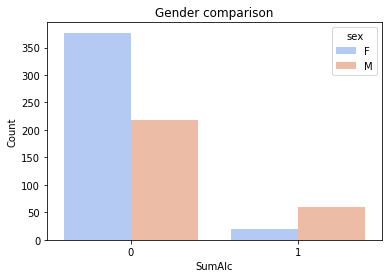

In [28]:
#Gender Count
plot = sns.countplot(x='SumAlc', hue='sex', data=merged, palette='coolwarm')
plot.set(xlabel='SumAlc', ylabel='Count', title='Gender comparison')
plt.show()

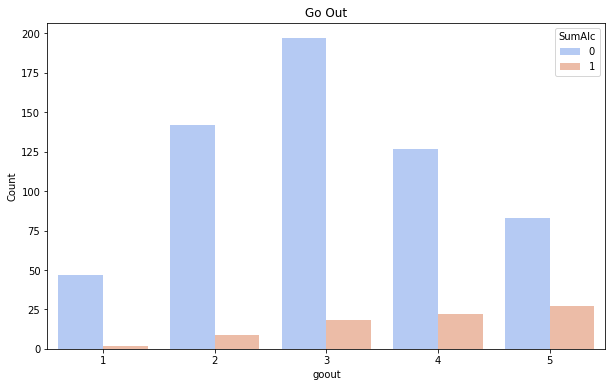

In [29]:
#Goout Count
plt.figure(figsize=(10,6))
plot = sns.countplot(x='goout', hue='SumAlc', data=merged, palette='coolwarm')
plot.set(xlabel='goout', ylabel='Count', title='Go Out')
plt.show()

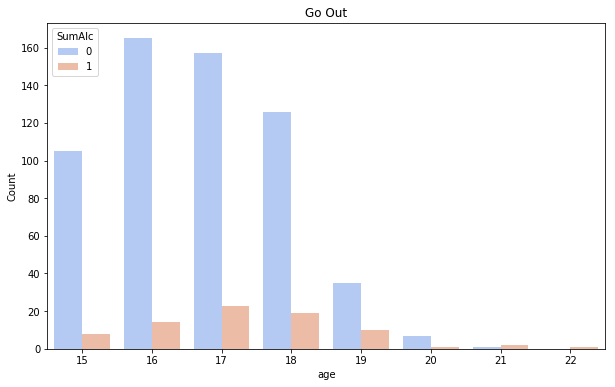

In [30]:
#Age Count
plt.figure(figsize=(10,6))
plot = sns.countplot(x='age', hue='SumAlc', data=merged, palette='coolwarm')
plot.set(xlabel='age', ylabel='Count', title='Go Out')
plt.show()

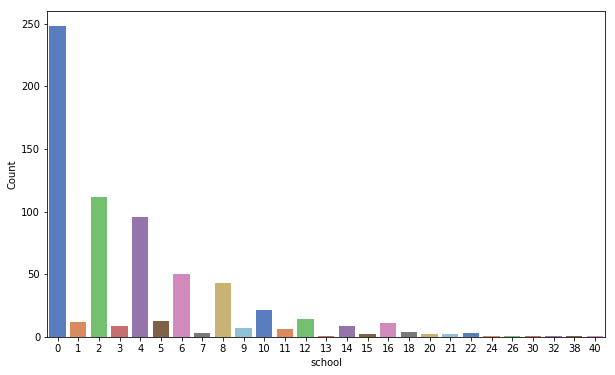

In [31]:
#absences
plt.figure(figsize=(10,6))
plot = sns.countplot(x='absences', data=merged,  palette="muted")
plot.set(xlabel='school', ylabel='Count')
plt.show()

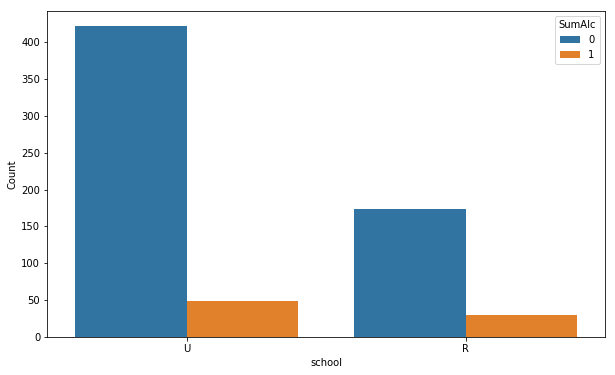

In [32]:
#address
plt.figure(figsize=(10,6))
plot = sns.countplot(x='address', hue='SumAlc', data=merged)
plot.set(xlabel='school', ylabel='Count')
plt.show()

In [33]:
# # drinker distribution by absences for Math
# target_0 = merged[merged['SumAlc'] == 0]
# target_1 = merged[merged['SumAlc'] == 1]

# plt.figure(figsize=(10,6))
# sns.distplot(target_0['absences'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = "Non drinkers")
# sns.distplot(target_1['absences'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = "Drinkers")


In [34]:
#Feature transformations
School = {'GP':1, 'MS':0}
merged['school'] = merged['school'].map(School)

gender = {'M':1, 'F':0}
merged['sex'] = merged['sex'].map(gender)

addressmap = {'U':1, 'R':0}
merged['address'] = merged['address'].map(addressmap)

familysize = {'GT3':1, 'LE3':0}
merged['famsize'] = merged['famsize'].map(familysize)

ParentStatus = {'A':1, 'T':0}
merged['Pstatus'] = merged['Pstatus'].map(ParentStatus)

Jobs = {'other':0,'at_home':1,'health':2,'services':3,'teacher':4}
merged['Mjob'] = merged['Mjob'].map(Jobs)
merged['Fjob'] = merged['Fjob'].map(Jobs)
merged['reason'].unique()
reasons = {'other':0,'course':1,'home':2,'reputation':3}
merged['reason'] = merged['reason'].map(reasons)
guardians = {'other':0,'mother':1,'father':2}
merged['guardian'] = merged['guardian'].map(guardians)

BinaryValue = {'yes':1, 'no':0}
merged['schoolsup'] = merged['schoolsup'].map(BinaryValue)
merged['famsup'] = merged['famsup'].map(BinaryValue)
merged['paid'] = merged['paid'].map(BinaryValue)
merged['activities'] = merged['activities'].map(BinaryValue)
merged['nursery'] = merged['nursery'].map(BinaryValue)
merged['higher'] = merged['higher'].map(BinaryValue)
merged['internet'] = merged['internet'].map(BinaryValue)
merged['romantic'] = merged['romantic'].map(BinaryValue)

#Features transformation tried but did not help 
# ## Change education level into binary values
# merged.loc[merged['Medu'] < 2, 'Medu'] = 0
# merged.loc[merged['Medu'] >=2, 'Medu' ] = 1

# merged.loc[merged['Fedu'] < 2, 'Fedu'] = 0
# merged.loc[merged['Fedu'] >= 2, 'Fedu'] = 1

# merged.loc[merged['absences'] < 5, 'absences'] = 0
# merged.loc[merged['absences'] >= 5, 'absences'] = 1

# #merged.loc[merged['age'] >= 18, 'age'] = 1 #18 is the legal drinking age
# #merged.loc[merged['age'] < 18, 'age'] = 0

# merged.loc[merged['studytime'] < 2, 'studytime'] = 1
# merged.loc[merged['studytime']>=2, 'studytime'] = 0

# merged.loc[merged['Fjob'] > 0, 'Fjob'] = 1
# merged.loc[merged['Fjob'] <= 0, 'Fjob'] = 0

# merged.loc[merged['Mjob'] > 0, 'Mjob'] = 1
# merged.loc[merged['Mjob'] <= 0, 'Mjob'] = 0
# ## Change father's education level

# Grades can be split into 5 level classification - 1(1-4); 2(5-8); 3(9-12); 4(13-16) 5(17-20)
# Or binary pass for >=10
# col = ['G1_mat','G2_mat','G3_mat','G1_por','G2_por','G3_por']
# for c in col:
#     merged[c].fillna(merged[c].mean(), inplace=True)
# merged.info()

# merged['G1_por'].fillna(merged['G1_mat'], inplace=True)
# merged['G2_por'].fillna(merged['G2_mat'], inplace=True)
# merged['G3_por'].fillna(merged['G3_mat'], inplace=True)
# merged['G1_mat'].fillna(merged['G1_por'], inplace=True)
# merged['G2_mat'].fillna(merged['G1_por'], inplace=True)
# merged['G3_mat'].fillna(merged['G1_por'], inplace=True)
# merged.info()
# merged.fillna(0, inplace=True)

# merged.loc[(merged['in_Math'] == 1) & (merged['in_Portuguese'] == 1), 'Both'] = 1
# merged['Both'].fillna(0, inplace=True)

# merged.head()
# merged.info()


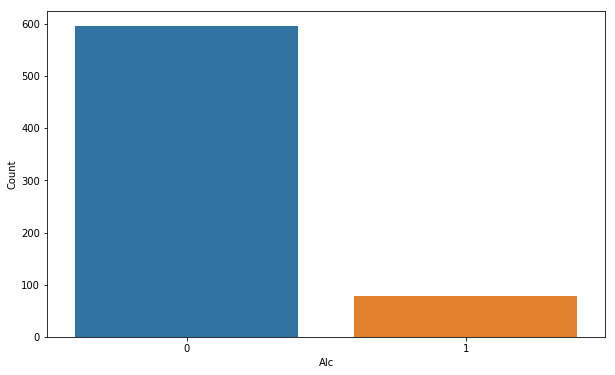

In [35]:
plt.figure(figsize=(10,6))
plot = sns.countplot(x='SumAlc', data=merged)
plot.set(xlabel='Alc', ylabel='Count')
plt.show()

In [36]:
merged['SumAlc'].value_counts()

0    596
1     78
Name: SumAlc, dtype: int64

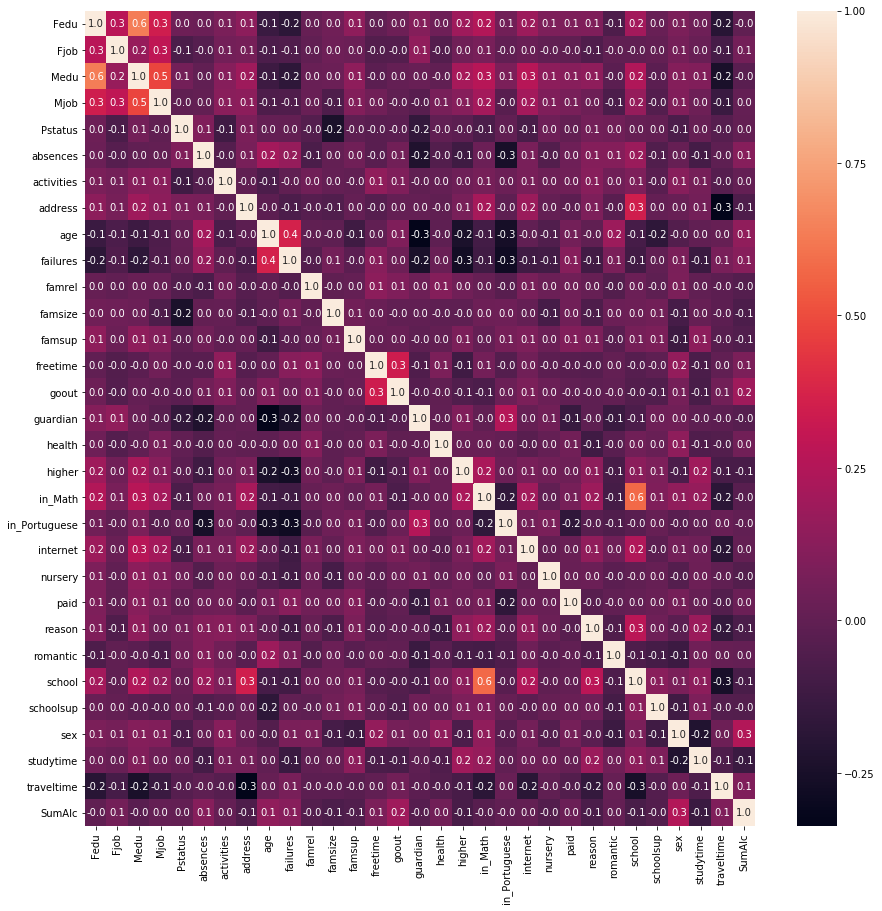

In [37]:
merged=merged.drop(columns=['hash','Unnamed: 0','G1_mat','G2_mat','G3_mat','G1_por','G2_por','G3_por','Dalc', 'Walc'])
# Correlation Matrix
corrmerged =merged.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrmerged, xticklabels=corrmerged.columns.values,yticklabels=corrmerged.columns.values, annot = True, annot_kws={"size": 10}, fmt = ".1f",cbar = True)

In [38]:
#important pvalue
import statsmodels.formula.api as smf
model=smf.ols('SumAlc~school+sex+age+address+famsize+Pstatus+Medu+Fedu+Mjob+Fjob+reason+guardian+traveltime+studytime+failures+schoolsup+famsup+paid+activities+nursery+higher+internet+romantic+famrel+freetime+goout+health+absences+in_Math+in_Portuguese', merged)
Fitting_results=model.fit()
print('math p-values are: \n',Fitting_results.pvalues)

math p-values are: 
 Intercept        5.314581e-03
school           1.574671e-01
sex              2.237825e-08
age              3.032445e-03
address          2.284500e-01
famsize          1.458944e-01
Pstatus          6.373660e-01
Medu             7.388520e-01
Fedu             9.887709e-01
Mjob             9.220088e-01
Fjob             7.428331e-02
reason           3.470140e-01
guardian         8.635472e-01
traveltime       2.874451e-01
studytime        3.099765e-01
failures         4.258195e-01
schoolsup        4.913625e-01
famsup           8.451794e-01
paid             5.977420e-01
activities       8.987825e-01
nursery          3.519714e-01
higher           8.015416e-01
internet         7.482388e-01
romantic         9.473049e-01
famrel           9.403954e-02
freetime         8.923907e-01
goout            2.372779e-05
health           4.298101e-01
absences         8.369099e-03
in_Math          3.831958e-01
in_Portuguese    6.821741e-02
dtype: float64


In [39]:
# ALL FEATURES
X_features = merged.drop(columns=['SumAlc'])
Y_targetClass=merged['SumAlc']
X_train, X_test, Y_train, Y_test = train_test_split(X_features,Y_targetClass,random_state=0)


# DATA BALANCING TECNIQUES
# RESAMPLING
from sklearn.utils import resample

X = pd.concat([X_train, Y_train], axis=1)
non_drinker = X[X.SumAlc==0]
drinker = X[X.SumAlc==1]

drinker_upsampled = resample(drinker,replace=True, # sample with replacement
                          n_samples=len(non_drinker), 
                          random_state=0)
upsampled = pd.concat([non_drinker, drinker_upsampled])

upsampled.SumAlc.value_counts()

Y_train = upsampled['SumAlc']
X_train = upsampled.drop('SumAlc', axis=1)

# from imblearn.over_sampling import SMOTE, ADASYN
#SMOTE

# sm = SMOTE(random_state=0, ratio=1.0)
# X_train, Y_train = sm.fit_sample(X_train, Y_train)
# scaler=preprocessing.MinMaxScaler().fit(X_train)

# ADASYN
# X_train, Y_train = ADASYN().fit_resample(X_train, Y_train)

# SCALING
scaler=preprocessing.MinMaxScaler().fit(X_train)
X_train_transformed=scaler.transform(X_train) 
X_test_transformed=scaler.transform(X_test)


The accuracy score is  0.85798816568
The precision score is  0.363636363636
The recall score is  0.190476190476
[[141   7]
 [ 17   4]]
[ 0.  1.]
[ 1.          0.19047619  0.        ]
The accuracy score is  0.85798816568
The precision score is  0.363636363636
The recall score is  0.190476190476
[[141   7]
 [ 17   4]]


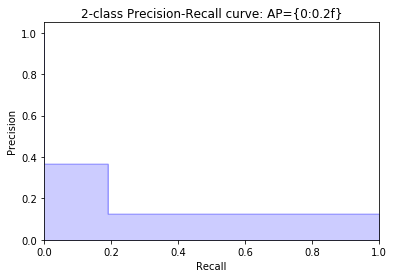

In [40]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier


best_score = 0;
K = [1,5,10, 20, 30 , 40 , 50 , 60 , 70 , 80 , 90, 100]
for k in K:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_transformed,Y_train, cv=10, scoring=make_scorer(f1_score))
    score=np.mean(scores)
    if score > best_score:
        best_score = score
        best_k = k
        
Bestknn=KNeighborsClassifier(n_neighbors=best_k)
Bestknn.fit(X_train_transformed, Y_train)
predict_knn = Bestknn.predict(X_test_transformed)
accuracy_knn= accuracy_score(Y_test,predict_knn)
precision_knn = precision_score(Y_test,predict_knn, pos_label=1)
recall_knn = recall_score(Y_test,predict_knn)
print("The accuracy score is ", accuracy_knn)
print("The precision score is ", precision_knn)
print("The recall score is ", recall_knn)

print(confusion_matrix(Y_test, predict_knn))


from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature


Y_prob =  Bestknn.predict_proba(X_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
print(thresholds)
print(recall)


threshold = 0.5
probs_positive_class = Bestknn.predict_proba(X_test_transformed)[:, 1]
predict_tknn = (probs_positive_class >= threshold).astype('int')
accuracy_tknn = accuracy_score(Y_test,predict_tknn)
precision_tknn = precision_score(Y_test,predict_tknn, pos_label=1)
recall_tknn = recall_score(Y_test,predict_tknn)
print("The accuracy score is ", accuracy_tknn)
print("The precision score is ", precision_tknn)
print("The recall score is ", recall_tknn)
print(confusion_matrix(Y_test, predict_tknn))


Tree NON SELECTED FEATURES
10
The accuracy score is  0.804733727811
The precision score is  0.125
The recall score is  0.0952380952381
[[134  14]
 [ 19   2]]
[ 0.03767228  0.04806858  0.00526727  0.03624909  0.00413649  0.06767706
  0.01441912  0.03636261  0.05390059  0.01162441  0.          0.00393951
  0.01378829  0.05616071  0.09191479  0.09570168  0.04551048  0.00878365
  0.          0.02978013  0.          0.0042626   0.01572276  0.07275534
  0.02497659  0.          0.          0.12109233  0.08865403  0.01157963]

Tree with threshold
The accuracy score is  0.804733727811
The precision score is  0.125
The recall score is  0.0952380952381
[[134  14]
 [ 19   2]]


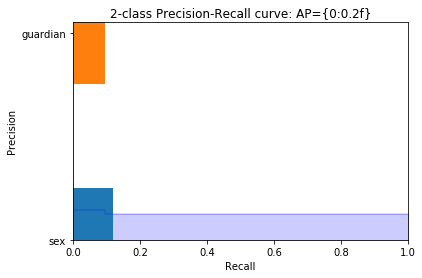

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
print("\nTree NON SELECTED FEATURES")
best_score = 0
X = [1,2,3,4,5,6,7,8,9,10]
for x in X:
    treeModel=DecisionTreeClassifier(max_depth=x, criterion='gini')
    scores = cross_val_score(treeModel, X_train_transformed,Y_train, cv=10, scoring=make_scorer(f1_score))
    score=np.mean(scores)
    if score > best_score:
      best_score = score
      best_depth = x
print(best_depth)
treeModel=DecisionTreeClassifier(max_depth=best_depth, criterion='gini')
treeModel.fit(X_train_transformed,Y_train)
accuracy = treeModel.score(X_test_transformed, Y_test)
predict_tree = treeModel.predict(X_test_transformed)
accuracy_tree = accuracy_score(Y_test,predict_tree)
precision_tree = precision_score(Y_test,predict_tree, pos_label=1)
recall_tree = recall_score(Y_test,predict_tree)

print("The accuracy score is ", accuracy_tree)
print("The precision score is ", precision_tree)
print("The recall score is ", recall_tree)
print(confusion_matrix(Y_test, predict_tree))

# feat_importances = pd.Series(treeModel.feature_importances_, index=X_features.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# print(treeModel.feature_importances_)

Y_prob =  treeModel.predict_proba(X_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')



print("\nTree with threshold")
threshold = 0.3
probs_positive_class = treeModel.predict_proba(X_test_transformed)[:, 1]
prediction = (probs_positive_class >= threshold).astype('int')
accuracy_ttree = accuracy_score(Y_test,prediction)
precision_ttree = precision_score(Y_test,prediction, pos_label=1)
recall_ttree = recall_score(Y_test,prediction)
print("The accuracy score is ", accuracy_ttree)
print("The precision score is ", precision_ttree)
print("The recall score is ", recall_ttree)
print(confusion_matrix(Y_test, prediction))




AdaBoostTree
The accuracy score is  0.786982248521
The precision score is  0.297297297297
The recall score is  0.52380952381
[[122  26]
 [ 10  11]]
[ 0.03013596  0.03474897  0.37556162  0.40758986  0.40984114  0.41075818
  0.41670073  0.42496118  0.43188864  0.43562992  0.43759796  0.44180692
  0.44971068  0.45018095  0.45097434  0.45201709  0.45205866  0.45673313
  0.45719266  0.46097528  0.46128622  0.46746062  0.46855074  0.46893387
  0.46949464  0.47092682  0.47125445  0.47324846  0.4732903   0.47518549
  0.47645877  0.47750918  0.47755106  0.48057211  0.48444443  0.48549612
  0.48644291  0.4867714   0.49024897  0.49071176  0.49257718  0.49304005
  0.49413447  0.49451905  0.49483185  0.49530683  0.49651907  0.49684778
  0.49888988  0.50103765  0.50213224  0.50540848  0.50684555  0.5068875
  0.50735036  0.50812152  0.51037577  0.51111525  0.5123908   0.51315618
  0.51548317  0.51586743  0.51745475  0.51819363  0.5203801   0.52147278
  0.52617577  0.52663744  0.53043316  0.53099393 

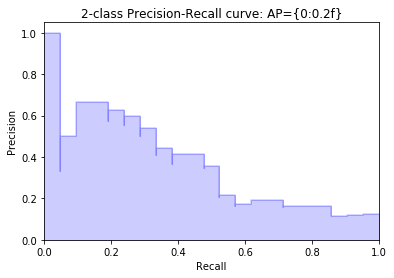

In [42]:
print("\nAdaBoostTree")
BoostModel= AdaBoostClassifier(n_estimators=10)
BoostModel.fit(X_train_transformed,Y_train)
predict_adatree = BoostModel.predict(X_test_transformed)
accuracy_adatree = accuracy_score(Y_test,predict_adatree)
precision_adatree = precision_score(Y_test,predict_adatree, pos_label=1)
recall_adatree = recall_score(Y_test,predict_adatree)

print("The accuracy score is ", accuracy_adatree)
print("The precision score is ", precision_adatree)
print("The recall score is ", recall_adatree)
print(confusion_matrix(Y_test, predict_adatree))

Y_prob =  BoostModel.predict_proba(X_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
print(thresholds)
print(recall)


print("\nAdaBoostTree with threshold")
threshold = 0.51
probs_positive_class = BoostModel.predict_proba(X_test_transformed)[:, 1]
predict_adattree = (probs_positive_class >= threshold).astype('int')
accuracy_adattree = accuracy_score(Y_test,predict_adattree)
precision_adattree = precision_score(Y_test,predict_adattree, pos_label=1)
recall_adattree = recall_score(Y_test,predict_adattree)
print("The accuracy score is ", accuracy_adattree)
print("The precision score is ", precision_adattree)
print("The recall score is ", recall_adattree)
print(confusion_matrix(Y_test, predict_adattree))


Tree with bagging
The accuracy score is  0.840236686391
The precision score is  0.2
The recall score is  0.0952380952381
[[140   8]
 [ 19   2]]
[ 0.005       0.00909091  0.01        0.01353039  0.01434783  0.015
  0.01800987  0.01952381  0.02        0.02485075  0.025       0.03        0.035
  0.03958015  0.04        0.04375     0.04386364  0.049375    0.05        0.0545
  0.055       0.05944444  0.06        0.06428571  0.07485075  0.07899097
  0.07906672  0.07957627  0.08        0.0839899   0.08488636  0.085
  0.08823922  0.09        0.09136028  0.09866172  0.09912793  0.09934783
  0.10117971  0.105       0.1095679   0.10958887  0.11        0.11359524
  0.11864469  0.1190625   0.12        0.12201172  0.125       0.1282197
  0.12958333  0.13        0.13203977  0.1323428   0.135       0.13908291
  0.1490625   0.14932597  0.15        0.15963415  0.16        0.16098052
  0.165       0.17333163  0.17454545  0.17501286  0.18433981  0.18452381
  0.18523628  0.19271203  0.19473684  0.19648186

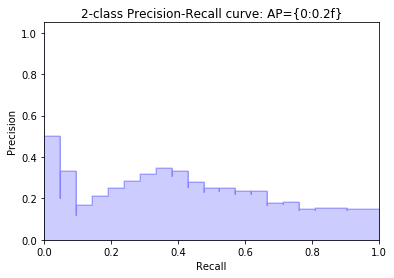

In [43]:
print("\nTree with bagging")
# TREE with Bagging
Bagmodel = BaggingClassifier(base_estimator=treeModel, n_estimators=200, random_state=0)
Bagmodel.fit(X_train_transformed,Y_train)
predict_tree_bag =Bagmodel.predict(X_test_transformed)
accuracy_tree_bag = accuracy_score(Y_test,predict_tree_bag)
precision_tree_bag = precision_score(Y_test,predict_tree_bag, pos_label=1)
recall_tree_bag = recall_score(Y_test,predict_tree_bag)

print("The accuracy score is ", accuracy_tree_bag)
print("The precision score is ", precision_tree_bag)
print("The recall score is ", recall_tree_bag)
print(confusion_matrix(Y_test, predict_tree_bag))

Y_prob =  Bagmodel.predict_proba(X_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
print(thresholds)
print(recall)

print("\nTree with bagging with threshold")
threshold = 0.23
probs_positive_class = Bagmodel.predict_proba(X_test_transformed)[:, 1]
predict_ttree_bag = (probs_positive_class >= threshold).astype('int')
accuracy_ttree_bag = accuracy_score(Y_test,predict_ttree_bag)
precision_ttree_bag = precision_score(Y_test,predict_ttree_bag, pos_label=1)
recall_ttree_bag = recall_score(Y_test,predict_ttree_bag)
print("The accuracy score is ", accuracy_ttree_bag)
print("The precision score is ", precision_ttree_bag)
print("The recall score is ", recall_ttree_bag)
print(confusion_matrix(Y_test, predict_ttree_bag))


 Random Forest
10
The accuracy score is  0.869822485207
The precision score is  0.333333333333
The recall score is  0.047619047619
[ 0.03275994  0.03943429  0.03728028  0.03399292  0.01123237  0.09879397
  0.01851934  0.02261069  0.06500049  0.03331346  0.03558466  0.01393976
  0.01925883  0.05831028  0.08585089  0.03123489  0.04176416  0.01441135
  0.01489088  0.00635798  0.01171283  0.01440398  0.0125636   0.04997961
  0.01369088  0.0146834   0.00560734  0.07931935  0.06091185  0.02258573]
[[146   2]
 [ 20   1]]

 Random Forest w threshold
The accuracy score is  0.816568047337
The precision score is  0.291666666667
The recall score is  0.333333333333
[[131  17]
 [ 14   7]]


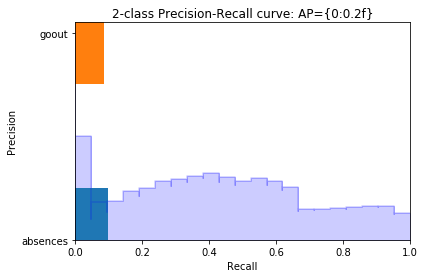

In [44]:
# RANDOM FOREST NO FEATURE SELECTION
print("\n Random Forest")
best_score = 0
X = [1,2,3,4,5,6,7,8,9,10]
for x in X:
    forestModel= RandomForestClassifier (n_estimators=200,max_depth=x, random_state=0)
    scores = cross_val_score(forestModel, X_train_transformed,Y_train, cv=10, scoring=make_scorer(f1_score))
    score=np.mean(scores)
    if score > best_score:
      best_score = score
      best_depth = x
print(best_depth)

forestModel= RandomForestClassifier (n_estimators=200,max_depth=best_depth, random_state=0)
forestModel.fit(X_train_transformed,Y_train)
predict_rtree = forestModel.predict(X_test_transformed)
accuracy_randomforest= accuracy_score(Y_test,predict_rtree)
precision_randomforest = precision_score(Y_test,predict_rtree, pos_label=1)
recall_randomforest = recall_score(Y_test,predict_rtree)

print("The accuracy score is ", accuracy_randomforest)
print("The precision score is ", precision_randomforest)
print("The recall score is ", recall_randomforest)

# feat_importances = pd.Series(forestModel.feature_importances_, index=X_features.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# print(forestModel.feature_importances_)

print(confusion_matrix(Y_test, predict_rtree))

Y_prob = forestModel.predict_proba(X_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
# print(thresholds)
# print(recall)

print("\n Random Forest w threshold")
threshold = 0.28
probs_positive_class = forestModel.predict_proba(X_test_transformed)[:, 1]
predict_trtree = (probs_positive_class >= threshold).astype('int')
accuracy_trtree = accuracy_score(Y_test,predict_trtree)
precision_trtree = precision_score(Y_test,predict_trtree, pos_label=1)
recall_trtree = recall_score(Y_test,predict_trtree)
print("The accuracy score is ", accuracy_trtree)
print("The precision score is ", precision_trtree)
print("The recall score is ", recall_trtree)
print(confusion_matrix(Y_test, predict_trtree))




 Bagging Random Forest
The accuracy score is  0.869822485207
The precision score is  0.25
The recall score is  0.047619047619
[[146   2]
 [ 20   1]]
[ 0.05476492  0.0556892   0.05585577  0.05632197  0.05807073  0.05832546
  0.0602407   0.0634775   0.06452567  0.06477834  0.06791694  0.07069278
  0.07218334  0.07437306  0.07503332  0.07676639  0.08053011  0.08134922
  0.08188276  0.08431481  0.08584282  0.08839618  0.08929261  0.09361733
  0.09526602  0.09914957  0.10342764  0.10517055  0.10607663  0.10899085
  0.11036811  0.11068791  0.11104328  0.11429907  0.11842414  0.11912137
  0.11943927  0.12188248  0.12489455  0.13113326  0.13284441  0.1329051
  0.13331796  0.13458143  0.13472108  0.13675307  0.13850671  0.13860057
  0.14220042  0.14285562  0.14342846  0.14391548  0.14428535  0.14441012
  0.14488064  0.14620324  0.15643021  0.16094148  0.16480834  0.16828694
  0.17062657  0.17241802  0.17250394  0.175752    0.17704831  0.17954587
  0.1799483   0.18124445  0.18234472  0.1828353 

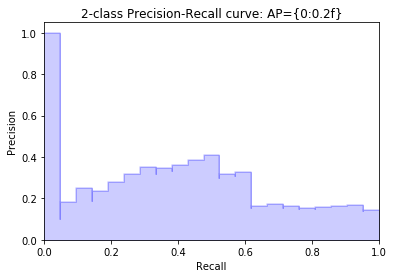

In [45]:
print("\n Bagging Random Forest")
rfbmodel = BaggingClassifier(base_estimator=forestModel, n_estimators=100, random_state=0)
predict_rfbtree = rfbmodel.fit(X_train_transformed,Y_train).predict(X_test_transformed)
accuracy_rfbtree= accuracy_score(Y_test,predict_rtree)
precision_rfbtree = precision_score(Y_test,predict_rfbtree, pos_label=1)
recall_rfbtree = recall_score(Y_test,predict_rfbtree)
print("The accuracy score is ", accuracy_rfbtree)
print("The precision score is ", precision_rfbtree)
print("The recall score is ", recall_rfbtree)
print(confusion_matrix(Y_test, predict_rtree))


Y_prob = rfbmodel.predict_proba(X_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
print(thresholds)
print(recall)

print("\n Bagging Random Forest w threshold")
threshold = 0.3
probs_positive_class = rfbmodel.predict_proba(X_test_transformed)[:, 1]
predict_trfbtree = (probs_positive_class >= threshold).astype('int')
accuracy_trfbtree = accuracy_score(Y_test,predict_trfbtree)
precision_trfbtree = precision_score(Y_test,predict_trfbtree, pos_label=1)
recall_trfbtree = recall_score(Y_test,predict_trfbtree)
print("The accuracy score is ", accuracy_trfbtree)
print("The precision score is ", precision_trfbtree)
print("The recall score is ", recall_trfbtree)
print(confusion_matrix(Y_test, predict_trfbtree))



20
The accuracy score is  0.769230769231
The precision score is  0.295454545455
The recall score is  0.619047619048
[[117  31]
 [  8  13]]
20
The accuracy score is  0.85798816568
The precision score is  0.428571428571
The recall score is  0.428571428571
[[136  12]
 [ 12   9]]


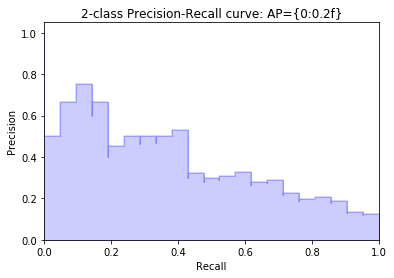

In [87]:
best_score = 0
k_folds = 10
for c in [0.01,.05,0.1,0.5,1,5,10,20,50]:
    logRegModel = LogisticRegression(C = c)
    scores = cross_val_score(logRegModel, X_train_transformed,Y_train, cv = k_folds,scoring=make_scorer(f1_score))
    score = np.mean(scores)
    #print(scores)
    if score > best_score:
        best_score = score
        best_parameter = c
    
logRegModel_final = LogisticRegression(C = best_parameter).fit(X_train_transformed,Y_train)
Y_Ridge_predict = logRegModel_final.predict(X_test_transformed)
precision_ridge = precision_score(Y_test,Y_Ridge_predict)
recall_ridge = recall_score(Y_test,Y_Ridge_predict)
accuracy_ridge = accuracy_score(Y_test,Y_Ridge_predict)
print(best_parameter)
print("The accuracy score is ", accuracy_ridge)
print("The precision score is ", precision_ridge)
print("The recall score is ", recall_ridge)
print(confusion_matrix(Y_test, Y_Ridge_predict))


Y_prob = logRegModel_final.predict_proba(X_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
# print(thresholds)
# print(recall)


threshold = 0.71
probs_positive_class = logRegModel_final.predict_proba(X_test_transformed)[:, 1]
Y_Ridge_predict = (probs_positive_class >= threshold).astype('int')
precision_tridge = precision_score(Y_test,Y_Ridge_predict)
recall_tridge = recall_score(Y_test,Y_Ridge_predict)
accuracy_tridge = accuracy_score(Y_test,Y_Ridge_predict)


print(best_parameter)
print("The accuracy score is ", accuracy_tridge)
print("The precision score is ", precision_tridge)
print("The recall score is ", recall_tridge)
print(confusion_matrix(Y_test, Y_Ridge_predict))

0.5

The Coefficients  [[-0.25157177  0.94421208 -0.17882525  0.          0.24119423  2.01950412
   0.         -0.34810891  1.67720797  0.41702711 -1.25605671 -0.37562129
   0.         -0.08590647  2.56918254 -0.01515978  0.63996904 -0.0595813
  -0.10454963  0.08722254  0.07868904 -0.18806354  0.74589233 -0.81810187
   0.         -0.11154113  0.          1.38357288 -1.13427931  0.43408423]]
The accuracy score is  0.745562130178
The precision score is  0.270833333333
The recall score is  0.619047619048
[[113  35]
 [  8  13]]
0.5
The accuracy score is  0.863905325444
The precision score is  0.454545454545
The recall score is  0.47619047619
[[136  12]
 [ 11  10]]


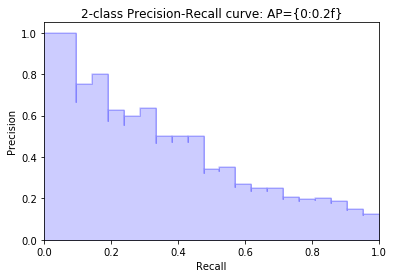

In [85]:
best_score = 0
k_folds = 10
for c in [0.01,.05,0.1,0.5,1,5,10,20,50]:
    logRegModel = LogisticRegression(C = c, penalty = "l1")
    scores = cross_val_score(logRegModel, X_train_transformed,Y_train, cv = k_folds, scoring=make_scorer(f1_score))
    score = np.mean(scores)
    #print(scores)
    if score > best_score:
        best_score = score
        best_parameter = c
    
logRegModel_final = LogisticRegression(C = best_parameter, penalty = "l1").fit(X_train_transformed,Y_train)
Y_lasso_predict = logRegModel_final.predict(X_test_transformed)
precision_lasso = precision_score(Y_test,Y_lasso_predict)
recall_lasso = recall_score(Y_test,Y_lasso_predict)
accuracy_lasso = accuracy_score(Y_test,Y_lasso_predict)
print(best_parameter)
print("\nThe Coefficients ", logRegModel_final.coef_)
print("The accuracy score is ", accuracy_lasso)
print("The precision score is ", precision_lasso)
print("The recall score is ", recall_lasso)
print(confusion_matrix(Y_test, Y_lasso_predict))

Y_prob = logRegModel_final.predict_proba(X_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
# print(thresholds)
# print(recall)
threshold = .68
probs_positive_class = logRegModel_final.predict_proba(X_test_transformed)[:, 1]
Y_lasso_predict = (probs_positive_class >= threshold).astype('int')
precision_tlasso = precision_score(Y_test,Y_lasso_predict)
recall_tlasso = recall_score(Y_test,Y_lasso_predict)
accuracy_tlasso = accuracy_score(Y_test,Y_lasso_predict)
print(best_parameter)
print("The accuracy score is ", accuracy_tlasso)
print("The precision score is ", precision_tlasso)
print("The recall score is ", recall_tlasso)
print(confusion_matrix(Y_test, Y_lasso_predict))

Test Score: 0.751479289941
The accuracy score is  0.751479289941
The precision score is  0.285714285714
The recall score is  0.666666666667
[[113  35]
 [  7  14]]
Test Score: 0.751479289941
The accuracy score is  0.852071005917
The precision score is  0.409090909091
The recall score is  0.428571428571
[[135  13]
 [ 12   9]]


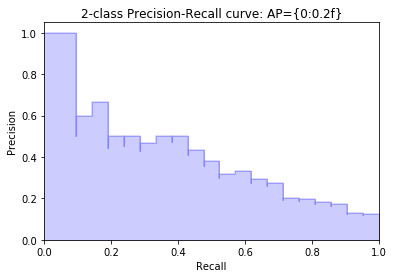

In [81]:
LDAmodelFitted = LinearDiscriminantAnalysis().fit(X_train_transformed, Y_train)
Y_LDA_predict = LDAmodelFitted.predict(X_test_transformed)
accuracy_LDA = accuracy_score(Y_test,Y_LDA_predict)
precision_LDA = precision_score(Y_test,Y_LDA_predict)
recall_LDA = recall_score(Y_test,Y_LDA_predict)
test_score_LDA = LDAmodelFitted.score(X_test_transformed,Y_test)
print("Test Score:", test_score_LDA)
print("The accuracy score is ", accuracy_LDA)
print("The precision score is ", precision_LDA)
print("The recall score is ", recall_LDA)
print(confusion_matrix(Y_test, Y_LDA_predict))


Y_prob = LDAmodelFitted.predict_proba(X_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
# print(thresholds)
# print(recall)

## Threshold found through separate cross validation
threshold = 0.71
probs_positive_class = LDAmodelFitted.predict_proba(X_test_transformed)[:, 1]
LDA_predicted= (probs_positive_class >= threshold).astype('int')
accuracy_tLDA = accuracy_score(Y_test,LDA_predicted)
precision_tLDA = precision_score(Y_test,LDA_predicted)
recall_tLDA = recall_score(Y_test,LDA_predicted)
test_score_tLDA = LDAmodelFitted.score(X_test,Y_test)
print("Test Score:", test_score_LDA)
print("The accuracy score is ", accuracy_tLDA)
print("The precision score is ", precision_tLDA)
print("The recall score is ", recall_tLDA)
print(confusion_matrix(Y_test, LDA_predicted))

lbfgs
tanh
The recall is: 0.333333333333
The precision is: 0.388888888889
The accuracy is : 0.852071005917
[[137  11]
 [ 14   7]]
[  2.04634453e-06   2.46647519e-06   2.51751444e-06   2.61313304e-06
   2.65590423e-06   3.15572721e-06   3.20452766e-06   3.24399142e-06
   3.50801692e-06   3.57362973e-06   4.15938594e-06   4.42188812e-06
   4.75044186e-06   4.76657018e-06   6.23760029e-06   6.32186874e-06
   6.80639655e-06   7.74127191e-06   8.16282514e-06   8.17794310e-06
   8.30250498e-06   8.32018441e-06   8.64082019e-06   8.90418211e-06
   9.03638139e-06   9.36455265e-06   9.39392883e-06   9.75291961e-06
   1.01519836e-05   1.02897140e-05   1.07847365e-05   1.12348636e-05
   1.16172477e-05   1.22958837e-05   1.28176637e-05   1.30376105e-05
   1.32494319e-05   1.41736457e-05   1.47669765e-05   1.51282747e-05
   1.56125013e-05   1.59837134e-05   1.66065024e-05   1.73772201e-05
   1.84032815e-05   1.99059530e-05   1.99311138e-05   2.22067938e-05
   2.22923786e-05   2.61327075e-05   2.685

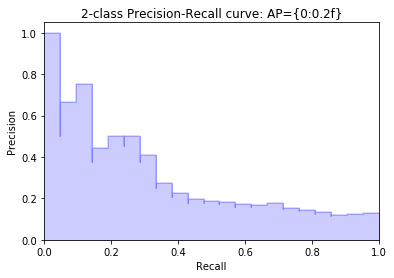

In [49]:
from sklearn.model_selection import cross_validate
def neuralFunctionCV(max_iter_,X_train,Y_train):
    recall = 0
    precision = 0
    best_solver = ''
    best_activation = ''
    best_average = 0
    scoring = ['precision_macro', 'recall_macro']
    solv = ['lbfgs', 'sgd']
    activation = ['logistic','relu','tanh','identity']
    for i in solv:
#         print(i)
        for j in activation:
#             print(j)
            mlp = MLPClassifier(solver = i, activation = j, 
                       random_state = 0,hidden_layer_sizes = (10,8), alpha = 0.5, max_iter = max_iter_,)
            scores = cross_validate(mlp, X_train,Y_train, scoring = 'f1_macro', cv = 10, return_train_score = False,)
            #print(scores)
            #recall_vals = np.mean(scores['test_recall_macro'])
            #precision_vals = np.mean(scores['test_precision_macro'])
            f_score = np.mean(scores['test_score'])
            #print(f_score)
            #print(precision_vals)
            if (f_score > best_average):
                best_solver = i
                best_activation = j
                best_average = f_score
    return [best_solver,best_activation]

  
vals = []
vals = neuralFunctionCV(9000, X_train_transformed, Y_train)
print(vals[0])
print(vals[1])
mlpModel = MLPClassifier(solver = vals[0], activation = vals[1], random_state = 0, alpha = 0.5, 
                        hidden_layer_sizes = (10,8), max_iter = 5000).fit(X_train_transformed,Y_train)
prediction_mlp=mlpModel.predict(X_test_transformed)
recall_mlp = recall_score(Y_test,prediction_mlp)
precision_mlp = precision_score(Y_test,prediction_mlp)
accuracy_mlp = accuracy_score(Y_test,prediction_mlp)
print("The recall is:",recall_mlp)
print("The precision is:",precision_mlp)
print("The accuracy is :", accuracy_mlp)
print(confusion_matrix(Y_test, prediction_mlp))

Y_prob = mlpModel.predict_proba(X_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
print(thresholds)
print(recall)

threshold = 0.4
probs_positive_class = mlpModel.predict_proba(X_test_transformed)[:, 1]
prediction_tmlp = (probs_positive_class >= threshold).astype('int')
recall_tmlp = recall_score(Y_test,prediction_mlp)
precision_tmlp = precision_score(Y_test,prediction_mlp)
accuracy_tmlp = accuracy_score(Y_test,prediction_mlp)
print("The recall is:",recall_tmlp)
print("The precision is:",precision_tmlp)
print("The accuracy is :", accuracy_tmlp)
print(confusion_matrix(Y_test, prediction_mlp))

In [52]:

for max_depth_mat in [1, 2, 3, 4, 5]:
    for min_child_weight_mat in [1, 2, 3, 4, 5]:
    #     print("Min Child Weight is " + str(min_child_weight_mat))
        for scale_pos_weight_mat in [1, 2, 3, 4, 5]:
    #         print("Scale Positive Weight is " + str(min_child_weight_mat))
            model = XGBClassifier(scale_pos_weight = scale_pos_weight_mat, min_child_weight = min_child_weight_mat, max_depth=max_depth_mat)
            model.fit(X_train_transformed, Y_train)
    #         print('---------------------------------------------------------------')
    #         print('Train')
            y_pred = model.predict(X_train_transformed)
            predictions = [round(value) for value in y_pred]
            train_acc = accuracy_score(Y_train, predictions)
            cm = confusion_matrix(Y_train, predictions)
#             print(cm)
    #         print("Accuracy: %.2f%%" % (accuracy * 100.0))
            train_prec = precision_score(Y_train, predictions)
    #         print("The precision score is ", precision_lasso)
            train_recall = recall_score(Y_train, predictions)
    #         print("The recall score is ", recall_lasso)
    #         print("--------------------------------------------------")
    #         print('Test')
            y_pred = model.predict(X_test_transformed)
            predictions = [round(value) for value in y_pred]
            accuracy_xgboost = accuracy_score(Y_test, predictions)
    #         cm = confusion_matrix(Y_test, predictions)
    #         print(cm)
    #         print("Accuracy: %.2f%%" % (accuracy * 100.0))
            precision_xgboost = precision_score(Y_test, predictions)
    #         print("The precision score is ", precision_lasso)
            recall_xgboost = recall_score(Y_test, predictions)
    #         print("The recall score is ", recall_lasso)
    #         print("--------------------------------------------------")
    #         print('---------------------------------------------------------------')

result_df = pd.DataFrame()
print("Train Accuracy = " + str(train_acc))
print("Test Accuracy = " + str(accuracy_xgboost))
print("Train Recall = " + str(train_recall))
print("Test Recall = " + str( precision_xgboost))
print("Train Precision = " + str(train_prec))
print("Test Precision = " + str(precision_xgboost))

0.712143670994
Recall: 0.714285714286
Precision: 0.272727272727
Accuracy: 0.727810650888
[[108  40]
 [  6  15]]
['sex', 'goout', 'studytime', 'age', 'traveltime', 'absences', 'failures', 'health', 'famrel', 'Fjob', 'higher', 'school', 'Medu', 'reason', 'paid', 'guardian', 'schoolsup', 'famsize', 'activities', 'freetime', 'in_Math', 'Fedu', 'address', 'in_Portuguese', 'famsup', 'internet', 'Mjob', 'Pstatus', 'nursery', 'romantic']
Recall: 0.47619047619
Precision: 0.5
Accuracy: 0.87573964497
[[138  10]
 [ 11  10]]


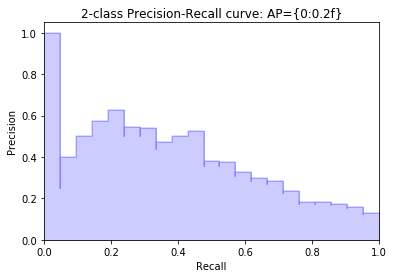

In [53]:
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

svmModel = SVC(kernel = "linear")


def svmFunction(X_train,X_test,Y_train,Y_test,kernel_type):
    best_val = 0
    best_c = 0
    for c in [0.01,0.1,1,10,50,100]:
        
        model = SVC(kernel = kernel_type,C = c)
        #scoring = ['precision_macro', 'recall_macro']
        scores = cross_validate(model, X_train,Y_train, scoring = 'f1_macro', cv = 5, return_train_score = False)
        f_val = np.mean(scores['test_score'])
        print(f_val)
        if f_val > best_val:
            best_val = f_val
            best_c = c

        svm = SVC(kernel = kernel_type, C = best_c, probability = True).fit(X_train,Y_train)
        
        y_predict = svm.predict(X_test)
        recall_svm = recall_score(Y_test,y_predict)
        precision_svm = precision_score(Y_test,y_predict)
        accuracy_svm = accuracy_score(Y_test,y_predict)
        print("Recall:",recall_svm)
        print("Precision:",precision_svm)
        print("Accuracy:", accuracy_svm)
        print(confusion_matrix(Y_test, y_predict))
        
        selector = RFE(svm, 1, step=1)
        selector = selector.fit(X_train, Y_train)
        list1 = selector.ranking_
        list2 = list(X_features)

        sorted = ['0'] * len(list2)
        for i in range(len(list2)):
            sorted[list1[i] - 1] = list2[i]

        print(sorted)


        
        Y_prob = svm.predict_proba(X_test)
        precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
        step_kwargs = ({'step': 'post'}
                       if 'step' in signature(plt.fill_between).parameters
                       else {})
        plt.step(recall, precision, color='b', alpha=0.2,
                 where='post')
        plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
#         print(thresholds)
#         print(recall)

        #y_predict =  svm.predict(X_test)
        threshold = 0.74
        probs_positive_class = svm.predict_proba(X_test)[:,1]
        y_predict = (probs_positive_class >= threshold).astype('int')
        recall_tsvm = recall_score(Y_test,y_predict)
        precision_tsvm = precision_score(Y_test,y_predict)
        accuracy_tsvm = accuracy_score(Y_test,y_predict)
        print("Recall:",recall_tsvm)
        print("Precision:",precision_tsvm)
        print("Accuracy:", accuracy_tsvm)
        print(confusion_matrix(Y_test, y_predict))
        return [svm,accuracy_tsvm,precision_tsvm,recall_tsvm,accuracy_svm,precision_svm,recall_svm]

vals2 = []
vals2 = svmFunction(X_train_transformed,X_test_transformed,Y_train,Y_test,'linear')

In [54]:
svm = SVC(kernel='linear')
selector = RFE(svmModel, 1, step=1)
selector1 = selector.fit(X_train_transformed, Y_train)
print(selector1.ranking_)
list1 = selector.ranking_
list2 = list(X_features)
sorted = ['0'] * len(list2)
for i in range(len(list2)):
    sorted[list1[i] - 1] = list2[i]

print(sorted)



[17  9 21 29 18  2 20 16  3  8  5 24 27 22  1 19 10 28 30 12 25 23 15 13 14
 11 26  4  6  7]
['goout', 'absences', 'age', 'sex', 'famrel', 'studytime', 'traveltime', 'failures', 'Fjob', 'health', 'school', 'in_Portuguese', 'reason', 'romantic', 'paid', 'address', 'Fedu', 'Pstatus', 'guardian', 'activities', 'Medu', 'freetime', 'nursery', 'famsize', 'internet', 'schoolsup', 'famsup', 'higher', 'Mjob', 'in_Math']


In [56]:
rf_vals =[accuracy_randomforest,precision_randomforest,recall_randomforest]
trf_vals =[accuracy_trtree,precision_trtree,recall_trtree]
rfb_vals =[accuracy_rfbtree,precision_rfbtree,recall_rfbtree]
trfb_vals =[accuracy_trfbtree,precision_trfbtree,recall_trfbtree]
tree_vals =[accuracy_tree,precision_tree,recall_tree]
ttree_vals =[accuracy_ttree,precision_ttree,recall_ttree]
adatree_vals =[accuracy_adatree,precision_adatree,recall_adatree]
adattree_vals =[accuracy_adattree,precision_adattree,recall_adattree]
btree_vals =[accuracy_tree_bag,precision_tree_bag,recall_tree_bag]
tbtree_vals =[accuracy_ttree_bag,precision_ttree_bag,recall_ttree_bag]
knn_vals = [accuracy_knn,precision_knn,recall_knn]
tknn_vals = [accuracy_tknn,precision_tknn,recall_tknn]
rid_vals = [accuracy_ridge,precision_ridge,recall_ridge]
trid_vals = [accuracy_tridge,precision_tridge,recall_tridge]
las_vals = [accuracy_lasso,precision_lasso,recall_lasso]
tlas_vals = [accuracy_tlasso,precision_tlasso,recall_tlasso]
lda_vals = [accuracy_LDA,precision_LDA,recall_LDA]
tlda_vals = [accuracy_tLDA,precision_tLDA,recall_tLDA]
mlp_vals = [accuracy_mlp,precision_mlp,recall_mlp]
tmlp_vals = [accuracy_tmlp,precision_tmlp,recall_tmlp]
tsvm_vals = [vals2[1],vals2[2],vals2[3]]
svm_vals = [vals2[4],vals2[5],vals2[6]]
xgboost_vals = [accuracy_xgboost,precision_xgboost,recall_xgboost]

# print("Random Forest Vals ",rf_vals)
# print("Bagging Random Forest Vals ",rfb_vals)
# print("Decision Tree", tree_vals)
# print("Bagging Decision Tree", btree_vals)
# print("Knn values ",knn_vals)
# print("Ridge values ",rid_vals)
# print("Lasso values ",las_vals)
# print("LDA Vals ",lda_vals)
# print("Neural Network vals" , mlp_vals)
# print("Gradient Boosting vals", xgboost_vals)

#accuracy = [accuracy_rfbtree,accuracy_tree, accuracy_knn, accuracy_QDA, accuracy_mlp, test_acc]
#precision = [precision_rfbtree,precision_tree, precision_knn,precision_QDA, precision_mlp, test_prec]
#recall = [recall_rfbtree, recall_tree, recall_knn, recall_QDA, recall_mlp, test_recall]

totals = np.array([rf_vals,trf_vals,rfb_vals,trfb_vals,tree_vals,ttree_vals,adatree_vals, adattree_vals,btree_vals,tbtree_vals, knn_vals,tknn_vals, rid_vals,trid_vals, las_vals,tlas_vals, lda_vals,tlda_vals, mlp_vals, tmlp_vals,svm_vals,tsvm_vals,xgboost_vals])
model_types = ['Random Forest','Random Forest w. threshold','Random Forest Bagging','Random Forest Bagging w. threshold','Decision Tree','Decision Tree w. threshold','Adaboost','Adaboost w. threshold','Decision Tree Bagging','Decision Tree Bagging w. threshold',"K-Nearest Neighbor",'K-Nearest Neighbor w. threshold','Logistic Reg Ridge','Logistic Reg Ridge w. threshold','Logistic Reg Lasso','Logistic Reg Lasso w. threshold', "LDA",'LDA w. threshold', "MLP",'MLP w. threshold','Support Vector Machine','Support Vector Machine w. threshold', "XgBoost" ]
metrics = ["Accuracy","Precision", "Recall"]

result_measurements = pd.DataFrame(totals.reshape(len(model_types),3),index = model_types, columns = metrics)
result_measurements

NameError: name 'accuracy_xgboost' is not defined

In [58]:
#FOR P-value selected features
X_selected_features = merged[['sex','absences','goout','age']]

#FOR RFE selected features
#X_selected_features = merged[['goout', 'absences', 'age', 'sex', 'traveltime', 'studytime', 'health', 'famrel', 'in_Portuguese', 'school', 'guardian']]
 
Y_targetClass=merged['SumAlc']
X_selected_train, X_selected_test, Y_selected_train, Y_selected_test = train_test_split(X_selected_features,Y_targetClass,random_state=0)


#RESAMPLING

from sklearn.utils import resample

X = pd.concat([X_selected_train, Y_selected_train], axis=1)
non_drinker = X[X.SumAlc==0]
drinker = X[X.SumAlc==1]

# upsample minority
drinker_upsampled = resample(drinker,replace=True, # sample with replacement
                          n_samples=len(non_drinker), 
                          random_state=0) 

upsampled = pd.concat([non_drinker, drinker_upsampled])

upsampled.SumAlc.value_counts()

Y_selected_train = upsampled['SumAlc']
X_selected_train = upsampled.drop('SumAlc', axis=1)

from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=0, ratio=1.0)
# X_selected_train, Y_selected_train = sm.fit_sample(X_selected_train, Y_selected_train)

# X_selected_train, Y_selected_train = ADASYN().fit_resample(X_selected_train, Y_selected_train)

#SCALING

scaler=preprocessing.MinMaxScaler().fit(X_selected_train)
X_selected_train_transformed=scaler.transform(X_selected_train) 
X_selected_test_transformed=scaler.transform(X_selected_test)




The accuracy score is  0.757396449704
The precision score is  0.25
The recall score is  0.47619047619
[[118  30]
 [ 11  10]]
The accuracy score is  0.810650887574
The precision score is  0.310344827586
The recall score is  0.428571428571
[[128  20]
 [ 12   9]]


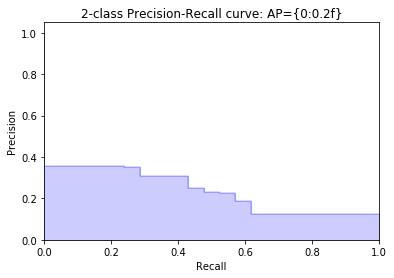

In [59]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier


best_score = 0;
K = [1,5,10, 20, 30 , 40 , 50 , 60 , 70 , 80 , 90, 100]
for k in K:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_selected_train_transformed,Y_selected_train, cv=10, scoring=make_scorer(recall_score))
    score=np.mean(scores)
    if score > best_score:
        best_score = score
        best_k = k
        
Bestknn=KNeighborsClassifier(n_neighbors=best_k)
Bestknn.fit(X_selected_train_transformed, Y_selected_train)
predict_knn = Bestknn.predict(X_selected_test_transformed)
accuracy_knn= accuracy_score(Y_selected_test,predict_knn)
precision_knn = precision_score(Y_selected_test,predict_knn, pos_label=1)
recall_knn = recall_score(Y_selected_test,predict_knn)
print("The accuracy score is ", accuracy_knn)
print("The precision score is ", precision_knn)
print("The recall score is ", recall_knn)

print(confusion_matrix(Y_selected_test, predict_knn))

Y_prob = Bestknn.predict_proba(X_selected_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
# print(thresholds)
# print(recall)

threshold = 0.65
probs_positive_class = Bestknn.predict_proba(X_selected_test_transformed)[:, 1]
predict_tknn = (probs_positive_class >= threshold).astype('int')
accuracy_tknn = accuracy_score(Y_selected_test,predict_tknn)
precision_tknn = precision_score(Y_selected_test,predict_tknn, pos_label=1)
recall_tknn = recall_score(Y_selected_test,predict_tknn)
print("The accuracy score is ", accuracy_tknn)
print("The precision score is ", precision_tknn)
print("The recall score is ", recall_tknn)
print(confusion_matrix(Y_selected_test, predict_tknn))


Tree SELECTED FEATURES
5
The accuracy score is  0.810650887574
The precision score is  0.310344827586
The recall score is  0.428571428571
[[128  20]
 [ 12   9]]

Tree with threshold
The accuracy score is  0.828402366864
The precision score is  0.346153846154
The recall score is  0.428571428571
[[131  17]
 [ 12   9]]


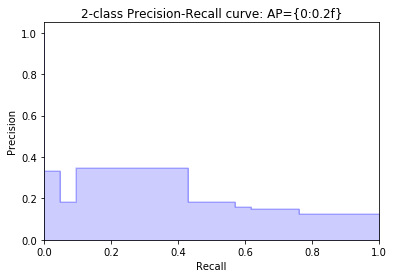

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

print("\nTree SELECTED FEATURES")
best_score = 0
X = [1,2,3,4,5]
for x in X:
    treeModel=DecisionTreeClassifier(max_depth=x, criterion='gini')
    scores = cross_val_score(treeModel, X_selected_train_transformed,Y_selected_train, cv=10, scoring=make_scorer(recall_score))
    score=np.mean(scores)
    if score > best_score:
      best_score = score
      best_depth = x
print(best_depth)
treeModel=DecisionTreeClassifier(max_depth=best_depth, criterion='gini')
treeModel.fit(X_selected_train_transformed,Y_selected_train)
accuracy = treeModel.score(X_selected_test_transformed, Y_selected_test)
predict_tree = treeModel.predict(X_selected_test_transformed)
accuracy_tree = accuracy_score(Y_selected_test,predict_tree)
precision_tree = precision_score(Y_selected_test,predict_tree, pos_label=1)
recall_tree = recall_score(Y_selected_test,predict_tree)

print("The accuracy score is ", accuracy_tree)
print("The precision score is ", precision_tree)
print("The recall score is ", recall_tree)
print(confusion_matrix(Y_selected_test, predict_tree))

# feat_importances = pd.Series(treeModel.feature_importances_, index=X_selected_features.columns)
# feat_importances.nlargest(5).plot(kind='barh')
# print(treeModel.feature_importances_)


Y_prob = treeModel.predict_proba(X_selected_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
# print(thresholds)
# print(recall)

print("\nTree with threshold")
threshold = 0.72
probs_positive_class = treeModel.predict_proba(X_selected_test_transformed)[:, 1]
prediction = (probs_positive_class >= threshold).astype('int')
accuracy_ttree = accuracy_score(Y_selected_test,prediction)
precision_ttree = precision_score(Y_selected_test,prediction, pos_label=1)
recall_ttree = recall_score(Y_selected_test,prediction)
print("The accuracy score is ", accuracy_ttree)
print("The precision score is ", precision_ttree)
print("The recall score is ", recall_ttree)
print(confusion_matrix(Y_selected_test, prediction))


AdaBoostTree
The accuracy score is  0.792899408284
The precision score is  0.266666666667
The recall score is  0.380952380952
[[126  22]
 [ 13   8]]

AdaBoostTree with threshold
The accuracy score is  0.822485207101
The precision score is  0.304347826087
The recall score is  0.333333333333
[[132  16]
 [ 14   7]]


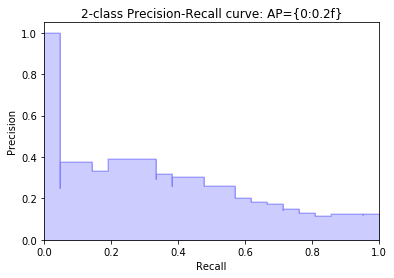

In [61]:
print("\nAdaBoostTree")
BoostModel= AdaBoostClassifier(n_estimators=10)
BoostModel.fit(X_selected_train_transformed,Y_selected_train)
predict_adatree = BoostModel.predict(X_selected_test_transformed)
accuracy_adatree = accuracy_score(Y_selected_test,predict_adatree)
precision_adatree = precision_score(Y_selected_test,predict_adatree, pos_label=1)
recall_adatree = recall_score(Y_selected_test,predict_adatree)

print("The accuracy score is ", accuracy_adatree)
print("The precision score is ", precision_adatree)
print("The recall score is ", recall_adatree)
print(confusion_matrix(Y_selected_test, predict_adatree))


Y_prob = BoostModel.predict_proba(X_selected_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
# print(thresholds)
# print(recall)

print("\nAdaBoostTree with threshold")
threshold = 0.51
probs_positive_class = BoostModel.predict_proba(X_selected_test_transformed)[:, 1]
predict_adattree = (probs_positive_class >= threshold).astype('int')
accuracy_adattree = accuracy_score(Y_selected_test,predict_adattree)
precision_adattree = precision_score(Y_selected_test,predict_adattree, pos_label=1)
recall_adattree = recall_score(Y_selected_test,predict_adattree)
print("The accuracy score is ", accuracy_adattree)
print("The precision score is ", precision_adattree)
print("The recall score is ", recall_adattree)
print(confusion_matrix(Y_selected_test, predict_adattree))



Tree with bagging
The accuracy score is  0.810650887574
The precision score is  0.310344827586
The recall score is  0.428571428571
[[128  20]
 [ 12   9]]

Tree with bagging with threshold
The accuracy score is  0.816568047337
The precision score is  0.321428571429
The recall score is  0.428571428571
[[129  19]
 [ 12   9]]


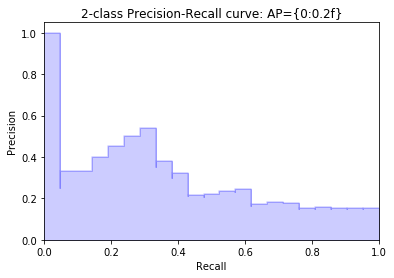

In [62]:
# TREE with Bagging
print("\nTree with bagging")
Bagmodel = BaggingClassifier(base_estimator=treeModel, n_estimators=200, random_state=0)
Bagmodel.fit(X_selected_train_transformed,Y_selected_train)
predict_tree_bag =Bagmodel.predict(X_selected_test_transformed)
accuracy_tree_bag = accuracy_score(Y_selected_test,predict_tree_bag)
precision_tree_bag = precision_score(Y_selected_test,predict_tree_bag, pos_label=1)
recall_tree_bag = recall_score(Y_selected_test,predict_tree_bag)

print("The accuracy score is ", accuracy_tree_bag)
print("The precision score is ", precision_tree_bag)
print("The recall score is ", recall_tree_bag)
print(confusion_matrix(Y_selected_test, predict_tree_bag))


Y_prob = Bagmodel.predict_proba(X_selected_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
# print(thresholds)
# print(recall)

print("\nTree with bagging with threshold")
threshold = 0.53
probs_positive_class = Bagmodel.predict_proba(X_selected_test_transformed)[:, 1]
predict_ttree_bag = (probs_positive_class >= threshold).astype('int')
accuracy_ttree_bag = accuracy_score(Y_selected_test,predict_ttree_bag)
precision_ttree_bag = precision_score(Y_selected_test,predict_ttree_bag, pos_label=1)
recall_ttree_bag = recall_score(Y_selected_test,predict_ttree_bag)
print("The accuracy score is ", accuracy_ttree_bag)
print("The precision score is ", precision_ttree_bag)
print("The recall score is ", recall_ttree_bag)
print(confusion_matrix(Y_selected_test, predict_ttree_bag))



 Random Forest
5
The accuracy score is  0.792899408284
The precision score is  0.28125
The recall score is  0.428571428571
[[125  23]
 [ 12   9]]

 Random Forest w threshold
The accuracy score is  0.834319526627
The precision score is  0.36
The recall score is  0.428571428571
[[132  16]
 [ 12   9]]


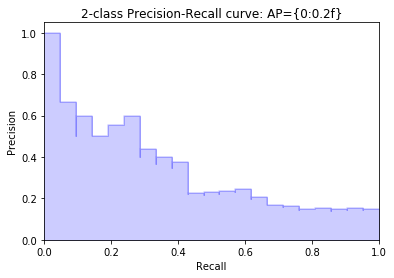

In [63]:
# RANDOM FOREST FEATURE SELECTION
print("\n Random Forest")
best_score = 0
X = [1,2,3,4,5]
for x in X:
    forestModel= RandomForestClassifier (n_estimators=200,max_depth=x, random_state=0)
    scores = cross_val_score(forestModel, X_selected_train_transformed,Y_selected_train, cv=10, scoring=make_scorer(recall_score))
    score=np.mean(scores)
    if score > best_score:
      best_score = score
      best_depth = x
print(best_depth)

forestModel= RandomForestClassifier (n_estimators=200,max_depth=best_depth, random_state=0)
forestModel.fit(X_selected_train_transformed,Y_selected_train)
predict_rtree = forestModel.predict(X_selected_test_transformed)
accuracy_randomforest= accuracy_score(Y_selected_test,predict_rtree)
precision_randomforest = precision_score(Y_selected_test,predict_rtree, pos_label=1)
recall_randomforest = recall_score(Y_selected_test,predict_rtree)

print("The accuracy score is ", accuracy_randomforest)
print("The precision score is ", precision_randomforest)
print("The recall score is ", recall_randomforest)

# feat_importances = pd.Series(forestModel.feature_importances_, index=X_selected_features.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# print(forestModel.feature_importances_)

print(confusion_matrix(Y_selected_test, predict_rtree))



Y_prob = forestModel.predict_proba(X_selected_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
# print(thresholds)
# print(recall)

print("\n Random Forest w threshold")
threshold = 0.55
probs_positive_class = forestModel.predict_proba(X_selected_test_transformed)[:, 1]
predict_trtree = (probs_positive_class >= threshold).astype('int')
accuracy_trtree = accuracy_score(Y_selected_test,predict_trtree)
precision_trtree = precision_score(Y_selected_test,predict_trtree, pos_label=1)
recall_trtree = recall_score(Y_selected_test,predict_trtree)
print("The accuracy score is ", accuracy_trtree)
print("The precision score is ", precision_trtree)
print("The recall score is ", recall_trtree)
print(confusion_matrix(Y_selected_test, predict_trtree))




 Bagging Random Forest
The accuracy score is  0.792899408284
The precision score is  0.25
The recall score is  0.428571428571
[[125  23]
 [ 12   9]]

 Bagging Random Forest w threshold
The accuracy score is  0.863905325444
The precision score is  0.45
The recall score is  0.428571428571
[[137  11]
 [ 12   9]]


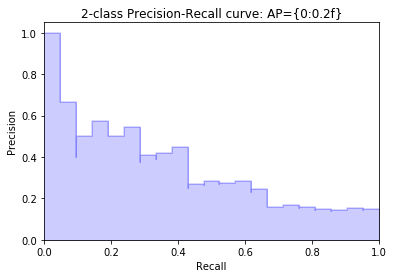

In [64]:

print("\n Bagging Random Forest")
rfbmodel = BaggingClassifier(base_estimator=forestModel, n_estimators=100, random_state=0)
predict_rfbtree = rfbmodel.fit(X_selected_train_transformed,Y_train).predict(X_selected_test_transformed)
accuracy_rfbtree= accuracy_score(Y_selected_test,predict_rtree)
precision_rfbtree = precision_score(Y_selected_test,predict_rfbtree, pos_label=1)
recall_rfbtree = recall_score(Y_selected_test,predict_rfbtree)
print("The accuracy score is ", accuracy_rfbtree)
print("The precision score is ", precision_rfbtree)
print("The recall score is ", recall_rfbtree)
print(confusion_matrix(Y_selected_test, predict_rtree))



Y_prob = rfbmodel.predict_proba(X_selected_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
# print(thresholds)
# print(recall)

print("\n Bagging Random Forest w threshold")
threshold = 0.58
probs_positive_class = rfbmodel.predict_proba(X_selected_test_transformed)[:, 1]
predict_trfbtree = (probs_positive_class >= threshold).astype('int')
accuracy_trfbtree = accuracy_score(Y_selected_test,predict_trfbtree)
precision_trfbtree = precision_score(Y_selected_test,predict_trfbtree, pos_label=1)
recall_trfbtree = recall_score(Y_selected_test,predict_trfbtree)
print("The accuracy score is ", accuracy_trfbtree)
print("The precision score is ", precision_trfbtree)
print("The recall score is ", recall_trfbtree)
print(confusion_matrix(Y_selected_test, predict_trfbtree))

20
The accuracy score is  0.775147928994
The precision score is  0.292682926829
The recall score is  0.571428571429
[[119  29]
 [  9  12]]
20
The accuracy score is  0.881656804734
The precision score is  0.52380952381
The recall score is  0.52380952381
[[138  10]
 [ 10  11]]


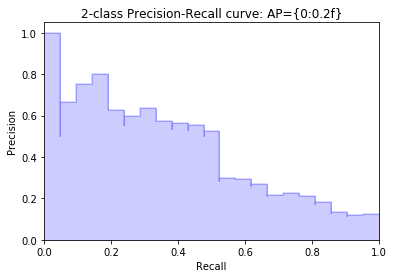

In [90]:
best_score = 0
k_folds = 10
for c in [0.01,.05,0.1,0.5,1,5,10,20,50]:
    logRegModel = LogisticRegression(C = c)
    scores = cross_val_score(logRegModel, X_selected_train_transformed,Y_selected_train, cv = k_folds)
    score = np.mean(scores)
    #print(scores)
    if score > best_score:
        best_score = score
        best_parameter = c
    
logRegModel_final = LogisticRegression(C = best_parameter).fit(X_selected_train_transformed,Y_selected_train)
Y_Ridge_predict = logRegModel_final.predict(X_selected_test_transformed)
precision_ridge = precision_score(Y_selected_test,Y_Ridge_predict)
recall_ridge = recall_score(Y_selected_test,Y_Ridge_predict)
accuracy_ridge = accuracy_score(Y_selected_test,Y_Ridge_predict)
print(best_parameter)
print("The accuracy score is ", accuracy_ridge)
print("The precision score is ", precision_ridge)
print("The recall score is ", recall_ridge)
print(confusion_matrix(Y_selected_test, Y_Ridge_predict))



Y_prob = logRegModel_final.predict_proba(X_selected_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
# print(thresholds)
# print(recall)

threshold = 0.69
probs_positive_class = logRegModel_final.predict_proba(X_selected_test_transformed)[:, 1]
Y_Ridge_predict = (probs_positive_class >= threshold).astype('int')
precision_tridge = precision_score(Y_selected_test,Y_Ridge_predict)
recall_tridge = recall_score(Y_selected_test,Y_Ridge_predict)
accuracy_tridge = accuracy_score(Y_selected_test,Y_Ridge_predict)


print(best_parameter)
print("The accuracy score is ", accuracy_tridge)
print("The precision score is ", precision_tridge)
print("The recall score is ", recall_tridge)
print(confusion_matrix(Y_selected_test, Y_Ridge_predict))

10
The accuracy score is  0.775147928994
The precision score is  0.292682926829
The recall score is  0.571428571429
[[119  29]
 [  9  12]]
10
The accuracy score is  0.881656804734
The precision score is  0.52380952381
The recall score is  0.52380952381
[[138  10]
 [ 10  11]]


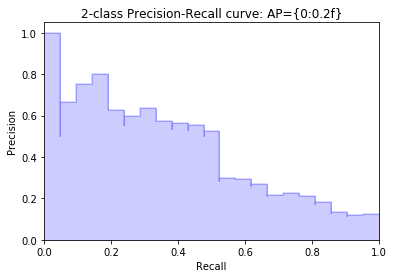

In [75]:
best_score = 0
k_folds = 10
for c in [0.01,.05,0.1,0.5,1,5,10,20,50]:
    logRegModel = LogisticRegression(C = c, penalty = "l1")
    scores = cross_val_score(logRegModel, X_selected_train_transformed,Y_selected_train, cv = k_folds)
    score = np.mean(scores)
    #print(scores)
    if score > best_score:
        best_score = score
        best_parameter = c
    
logRegModel_final = LogisticRegression(C = best_parameter, penalty = "l1").fit(X_selected_train_transformed,Y_selected_train)
Y_lasso_predict = logRegModel_final.predict(X_selected_test_transformed)
precision_lasso = precision_score(Y_selected_test,Y_lasso_predict)
recall_lasso = recall_score(Y_selected_test,Y_lasso_predict)
accuracy_lasso = accuracy_score(Y_selected_test,Y_lasso_predict)
print(best_parameter)
print("The accuracy score is ", accuracy_lasso)
print("The precision score is ", precision_lasso)
print("The recall score is ", recall_lasso)
print(confusion_matrix(Y_selected_test, Y_lasso_predict))

Y_prob = logRegModel_final.predict_proba(X_selected_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
# print(thresholds)
# print(recall)


threshold = 0.69
probs_positive_class = logRegModel_final.predict_proba(X_selected_test_transformed)[:, 1]
Y_lasso_predict = (probs_positive_class >= threshold).astype('int')
precision_tlasso = precision_score(Y_selected_test,Y_lasso_predict)
recall_tlasso = recall_score(Y_selected_test,Y_lasso_predict)
accuracy_tlasso = accuracy_score(Y_selected_test,Y_lasso_predict)


print(best_parameter)
print("The accuracy score is ", accuracy_tlasso)
print("The precision score is ", precision_tlasso)
print("The recall score is ", recall_tlasso)
print(confusion_matrix(Y_selected_test, Y_lasso_predict))

Test Score: 0.775147928994
The accuracy score is  0.775147928994
The precision score is  0.302325581395
The recall score is  0.619047619048
[[118  30]
 [  8  13]]
Test Score: 0.775147928994
The accuracy score is  0.887573964497
The precision score is  0.555555555556
The recall score is  0.47619047619
[[140   8]
 [ 11  10]]


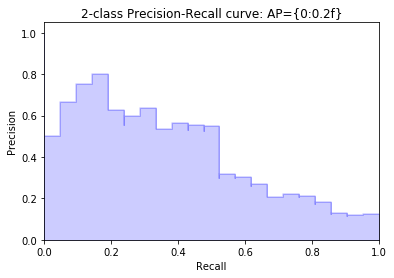

In [67]:
LDAmodelFitted = LinearDiscriminantAnalysis().fit(X_selected_train_transformed, Y_selected_train)
Y_LDA_predict = LDAmodelFitted.predict(X_selected_test_transformed)
accuracy_LDA = accuracy_score(Y_selected_test,Y_LDA_predict)
precision_LDA = precision_score(Y_selected_test,Y_LDA_predict)
recall_LDA = recall_score(Y_selected_test,Y_LDA_predict)
test_score_LDA = LDAmodelFitted.score(X_selected_test_transformed,Y_selected_test)
print("Test Score:", test_score_LDA)
print("The accuracy score is ", accuracy_LDA)
print("The precision score is ", precision_LDA)
print("The recall score is ", recall_LDA)
print(confusion_matrix(Y_selected_test, Y_LDA_predict))

Y_prob = LDAmodelFitted.predict_proba(X_selected_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
# print(thresholds)
# print(recall)
## Threshold found through separate cross validation
threshold = 0.74 #68
probs_positive_class = LDAmodelFitted.predict_proba(X_selected_test_transformed)[:, 1]
LDA_predicted= (probs_positive_class >= threshold).astype('int')
accuracy_tLDA = accuracy_score(Y_selected_test,LDA_predicted)
precision_tLDA = precision_score(Y_selected_test,LDA_predicted)
recall_tLDA = recall_score(Y_selected_test,LDA_predicted)
test_score_tLDA = LDAmodelFitted.score(X_selected_test,Y_selected_test)
print("Test Score:", test_score_LDA)
print("The accuracy score is ", accuracy_tLDA)
print("The precision score is ", precision_tLDA)
print("The recall score is ", recall_tLDA)
print(confusion_matrix(Y_selected_test, LDA_predicted))

lbfgs
logistic
relu
tanh
identity
sgd
logistic
relu
tanh
identity
lbfgs
tanh
The recall is: 0.333333333333
The precision is: 0.388888888889
The accuracy is : 0.852071005917
[[137  11]
 [ 14   7]]
[  2.80380015e-04   3.10234921e-04   3.17233449e-04   4.05193118e-04
   4.08613516e-04   4.11163102e-04   5.21894579e-04   6.22210643e-04
   7.53027211e-04   8.92552528e-04   9.19573611e-04   1.27276661e-03
   1.48708293e-03   1.52333727e-03   1.54734511e-03   1.93049037e-03
   2.02303919e-03   2.11944354e-03   2.16382137e-03   2.37706263e-03
   2.39043737e-03   2.61423435e-03   3.04901178e-03   3.15394943e-03
   3.22860448e-03   3.44397210e-03   3.52201176e-03   3.85657217e-03
   3.88629172e-03   4.66485781e-03   5.45055446e-03   5.78115179e-03
   5.86960157e-03   6.59052401e-03   6.76814488e-03   6.81316177e-03
   6.92585494e-03   6.93112898e-03   7.89144282e-03   8.67854525e-03
   9.58133294e-03   9.65636590e-03   1.09660962e-02   1.10005374e-02
   1.21960955e-02   1.42711826e-02   1.455656

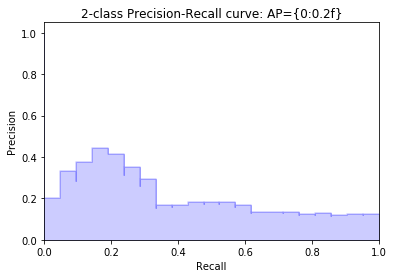

In [68]:
from sklearn.model_selection import cross_validate
def neuralFunctionCV(max_iter_,X_train,Y_train):
    recall = 0
    precision = 0
    best_solver = ''
    best_activation = ''
    best_average = 0
    scoring = ['precision_macro', 'recall_macro']
    solv = ['lbfgs', 'sgd']
    activation = ['logistic','relu','tanh','identity']
    for i in solv:
        print(i)
        for j in activation:
            print(j)
            mlp = MLPClassifier(solver = i, activation = j, 
                       random_state = 0,hidden_layer_sizes = (10,8), alpha = 0.5, max_iter = max_iter_,)
            scores = cross_validate(mlp, X_train,Y_train, scoring = 'f1_macro', cv = 10, return_train_score = False)
            #print(scores)
            #recall_vals = np.mean(scores['test_recall_macro'])
            #precision_vals = np.mean(scores['test_precision_macro'])
            f_score = np.mean(scores['test_score'])
            #print(f_score)
            #print(precision_vals)
            if (f_score > best_average):
                best_solver = i
                best_activation = j
                best_average = f_score
    return [best_solver,best_activation]

  
vals = []
vals = neuralFunctionCV(9000, X_selected_train_transformed, Y_selected_train)
print(vals[0])
print(vals[1])
mlpModel = MLPClassifier(solver = vals[0], activation = vals[1], random_state = 0, alpha = 0.5, 
                        hidden_layer_sizes = (10,8), max_iter = 5000).fit(X_selected_train_transformed,Y_selected_train)
recall_mlp = recall_score(Y_selected_test,prediction_mlp)
precision_mlp = precision_score(Y_selected_test,prediction_mlp)
accuracy_mlp = accuracy_score(Y_selected_test,prediction_mlp)
print("The recall is:",recall_mlp)
print("The precision is:",precision_mlp)
print("The accuracy is :", accuracy_mlp)
print(confusion_matrix(Y_selected_test, prediction_mlp))


Y_prob = mlpModel.predict_proba(X_selected_test_transformed)
precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
print(thresholds)
print(recall)
## Threshold found through separate cross validation


threshold = 0.5
probs_positive_class = mlpModel.predict_proba(X_selected_test_transformed)[:, 1]
prediction_tmlp = (probs_positive_class >= threshold).astype('int')
recall_tmlp = recall_score(Y_selected_test,prediction_mlp)
precision_tmlp = precision_score(Y_selected_test,prediction_mlp)
accuracy_tmlp = accuracy_score(Y_selected_test,prediction_mlp)
print("The recall is:",recall_tmlp)
print("The precision is:",precision_tmlp)
print("The accuracy is :", accuracy_tmlp)
print(confusion_matrix(Y_selected_test, prediction_mlp))


In [69]:

for max_depth_mat in [1, 2, 3, 4, 5]:
    for min_child_weight_mat in [1, 2, 3, 4, 5]:
    #     print("Min Child Weight is " + str(min_child_weight_mat))
        for scale_pos_weight_mat in [1, 2, 3, 4, 5]:
    #         print("Scale Positive Weight is " + str(min_child_weight_mat))
            model = XGBClassifier(scale_pos_weight = scale_pos_weight_mat, min_child_weight = min_child_weight_mat, max_depth=max_depth_mat)
            model.fit(X_selected_train_transformed, Y_selected_train)
    #         print('---------------------------------------------------------------')
    #         print('Train')
            y_pred = model.predict(X_selected_train_transformed)
            predictions = [round(value) for value in y_pred]
            train_acc = accuracy_score(Y_selected_train, predictions)
            cm = confusion_matrix(Y_selected_train, predictions)
#             print(cm)
    #         print("Accuracy: %.2f%%" % (accuracy * 100.0))
            train_prec = precision_score(Y_selected_train, predictions)
    #         print("The precision score is ", precision_lasso)
            train_recall = recall_score(Y_selected_train, predictions)
    #         print("The recall score is ", recall_lasso)
    #         print("--------------------------------------------------")
    #         print('Test')
            y_pred = model.predict(X_selected_test_transformed)
            predictions = [round(value) for value in y_pred]
            accuracy_xgboost = accuracy_score(Y_selected_test, predictions)
    #         cm = confusion_matrix(Y_test, predictions)
    #         print(cm)
    #         print("Accuracy: %.2f%%" % (accuracy * 100.0))
            precision_xgboost = precision_score(Y_selected_test, predictions)
    #         print("The precision score is ", precision_lasso)
            recall_xgboost = recall_score(Y_selected_test, predictions)
    #         print("The recall score is ", recall_lasso)
    #         print("--------------------------------------------------")
    #         print('---------------------------------------------------------------')

result_df = pd.DataFrame()
print("Train Accuracy = " + str(train_acc))
print("Test Accuracy = " + str(accuracy_xgboost))
print("Train Recall = " + str(train_recall))
print("Test Recall = " + str( precision_xgboost))
print("Train Precision = " + str(train_prec))
print("Test Precision = " + str(precision_xgboost))

NameError: name 'XGBClassifier' is not defined

0.668868454947
Recall: 0.761904761905
Precision: 0.238805970149
Accuracy: 0.668639053254
[[97 51]
 [ 5 16]]
Recall: 0.52380952381
Precision: 0.52380952381
Accuracy: 0.881656804734
[[138  10]
 [ 10  11]]


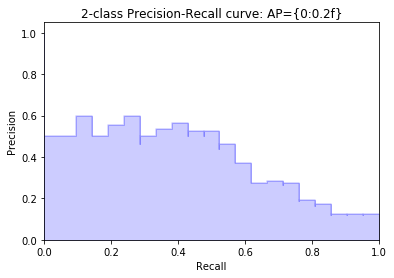

In [70]:
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

svmModel = SVC(kernel = "linear")


def svmFunction(X_train,X_test,Y_train,Y_test,kernel_type):
    best_val = 0
    best_c = 0
    for c in [0.01,0.1,1,10,50,100]:
        
        model = SVC(kernel = kernel_type,C = c)
        #scoring = ['precision_macro', 'recall_macro']
        scores = cross_validate(model, X_train,Y_train, scoring = 'f1_macro', cv = 5, return_train_score = False)
        f_val = np.mean(scores['test_score'])
        print(f_val)
        if f_val > best_val:
            best_val = f_val
            best_c = c

        svm = SVC(kernel = kernel_type, C = best_c, probability = True).fit(X_train,Y_train)
        
        y_predict = svm.predict(X_test)
        recall_svm = recall_score(Y_test,y_predict)
        precision_svm = precision_score(Y_test,y_predict)
        accuracy_svm = accuracy_score(Y_test,y_predict)
        print("Recall:",recall_svm)
        print("Precision:",precision_svm)
        print("Accuracy:", accuracy_svm)
        print(confusion_matrix(Y_test, y_predict))


        
        Y_prob = svm.predict_proba(X_test)
        precision, recall, thresholds = precision_recall_curve(Y_test, (Y_prob[:,1]))
        step_kwargs = ({'step': 'post'}
                       if 'step' in signature(plt.fill_between).parameters
                       else {})
        plt.step(recall, precision, color='b', alpha=0.2,
                 where='post')
        plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
#         print(thresholds)
#         print(recall)

        #y_predict =  svm.predict(X_test)
        threshold = 0.72
        probs_positive_class = svm.predict_proba(X_test)[:,1]
        y_predict = (probs_positive_class >= threshold).astype('int')
        recall_tsvm = recall_score(Y_test,y_predict)
        precision_tsvm = precision_score(Y_test,y_predict)
        accuracy_tsvm = accuracy_score(Y_test,y_predict)
        print("Recall:",recall_tsvm)
        print("Precision:",precision_tsvm)
        print("Accuracy:", accuracy_tsvm)
        print(confusion_matrix(Y_test, y_predict))
        return [svm,accuracy_tsvm,precision_tsvm,recall_tsvm,accuracy_svm,precision_svm,recall_svm]

vals2 = []
vals2 = svmFunction(X_selected_train_transformed,X_selected_test_transformed,Y_selected_train,Y_selected_test,'linear')

In [ ]:
rf_vals =[accuracy_randomforest,precision_randomforest,recall_randomforest]
trf_vals =[accuracy_trtree,precision_trtree,recall_trtree]
rfb_vals =[accuracy_rfbtree,precision_rfbtree,recall_rfbtree]
trfb_vals =[accuracy_trfbtree,precision_trfbtree,recall_trfbtree]
tree_vals =[accuracy_tree,precision_tree,recall_tree]
ttree_vals =[accuracy_ttree,precision_ttree,recall_ttree]
adatree_vals =[accuracy_adatree,precision_adatree,recall_adatree]
adattree_vals =[accuracy_adattree,precision_adattree,recall_adattree]
btree_vals =[accuracy_tree_bag,precision_tree_bag,recall_tree_bag]
tbtree_vals =[accuracy_ttree_bag,precision_ttree_bag,recall_ttree_bag]
knn_vals = [accuracy_knn,precision_knn,recall_knn]
tknn_vals = [accuracy_tknn,precision_tknn,recall_tknn]
rid_vals = [accuracy_ridge,precision_ridge,recall_ridge]
trid_vals = [accuracy_tridge,precision_tridge,recall_tridge]
las_vals = [accuracy_lasso,precision_lasso,recall_lasso]
tlas_vals = [accuracy_tlasso,precision_tlasso,recall_tlasso]
lda_vals = [accuracy_LDA,precision_LDA,recall_LDA]
tlda_vals = [accuracy_tLDA,precision_tLDA,recall_tLDA]
mlp_vals = [accuracy_mlp,precision_mlp,recall_mlp]
tmlp_vals = [accuracy_tmlp,precision_tmlp,recall_tmlp]
tsvm_vals = [vals2[1],vals2[2],vals2[3]]
svm_vals = [vals2[4],vals2[5],vals2[6]]
xgboost_vals = [accuracy_xgboost,precision_xgboost,recall_xgboost]

# print("Random Forest Vals ",rf_vals)
# print("Bagging Random Forest Vals ",rfb_vals)
# print("Decision Tree", tree_vals)
# print("Bagging Decision Tree", btree_vals)
# print("Knn values ",knn_vals)
# print("Ridge values ",rid_vals)
# print("Lasso values ",las_vals)
# print("LDA Vals ",lda_vals)
# print("Neural Network vals" , mlp_vals)
# print("Gradient Boosting vals", xgboost_vals)

#accuracy = [accuracy_rfbtree,accuracy_tree, accuracy_knn, accuracy_QDA, accuracy_mlp, test_acc]
#precision = [precision_rfbtree,precision_tree, precision_knn,precision_QDA, precision_mlp, test_prec]
#recall = [recall_rfbtree, recall_tree, recall_knn, recall_QDA, recall_mlp, test_recall]

totals = np.array([rf_vals,trf_vals,rfb_vals,trfb_vals,tree_vals,ttree_vals,adatree_vals, adattree_vals,btree_vals,tbtree_vals, knn_vals,tknn_vals, rid_vals,trid_vals, las_vals,tlas_vals, lda_vals,tlda_vals, mlp_vals, tmlp_vals,svm_vals,tsvm_vals,xgboost_vals])
model_types = ['Random Forest','Random Forest w. threshold','Random Forest Bagging','Random Forest Bagging w. threshold','Decision Tree','Decision Tree w. threshold','Adaboost','Adaboost w. threshold','Decision Tree Bagging','Decision Tree Bagging w. threshold',"K-Nearest Neighbor",'K-Nearest Neighbor w. threshold','Logistic Reg Ridge','Logistic Reg Ridge w. threshold','Logistic Reg Lasso','Logistic Reg Lasso w. threshold', "LDA",'LDA w. threshold', "MLP",'MLP w. threshold','Support Vector Machine','Support Vector Machine w. threshold', "XgBoost" ]
metrics = ["Accuracy","Precision", "Recall"]

result_measurements = pd.DataFrame(totals.reshape(len(model_types),3),index = model_types, columns = metrics)
result_measurements

In [ ]:
# sns.barplot(x = ['Random Forest threshold','QDA','MLP','XgBoost'],
#             y = result_measurements.loc[['Random Forest threshold','QDA','MLP','XgBoost'],'Accuracy'].values).set_title("Accuracy Comparisons")
            



In [ ]:
# sns.barplot(x = ['Random Forest threshold','QDA','MLP','XgBoost'],
            
#             y = result_measurements.loc[['Random Forest threshold','QDA','MLP','XgBoost'],'Precision'].values).set_title("Precision Comparisons")




In [ ]:
# sns.barplot(x = ['Random Forest threshold','QDA','MLP','XgBoost'],
#             y = result_measurements.loc[['Random Forest threshold','QDA','MLP','XgBoost'],'Recall'].values).set_title("Recall Comparisons")

In [ ]:
# algorithms = ['Random Forest', 'QDA' ,'Neural Net' ,'Extreme Gradient Boosting']

# rfb_vals =[accuracy_rtree,precision_rtree,recall_rtree]
# qda_vals = [accuracy_QDA,precision_QDA,recall_QDA]
# mlp_vals = [accuracy_mlp,precision_mlp,recall_mlp]
# xgboost_vals = [test_acc,test_prec,test_recall]

# accuracy = [accuracy_rtree, accuracy_QDA, accuracy_mlp, test_acc]
# precision = [precision_rtree, precision_QDA, precision_mlp, test_prec]
# recall = [recall_rtree, recall_QDA, recall_mlp, test_recall]

# plt.plot( x = algorithms, y=accuracy, marker='', color='blue', linewidth=2, label='Accurcay')
# # plt.plot( x = algorithms, y=precision, marker='', color='olive', linewidth=2, label='Precision')
# # plt.plot( x = algorithms, y=recall, marker='', color='magenta', linewidth=2, label='Recall')